<font size="20">

# LET measurements, April 2020

<font size="3">
    
> __Author:__ A. Backis
<br/>__Institute:__ European Spallation Source (ESS), University of Glasgow (UoG)
<br/>__Date:__ 4/3-2020

_Abstract:_
This notebook contains the data-analysis tools used for the measurements at the LET instrument at ISIS. It describes how the analysis was performed, and summarizes the results.

# Contents
    
* [1. Introduction](#INTRODUCTION)
    * [1.1 Packages](#PACKAGES)
    * [1.2 Global parameters](#PACKAGES)
* [2. Data](#DATA)
    * [2.1 Descriptions](#EXTRACT)
    * [2.2 Paths](#LOAD)
    * [2.3 Extract](#FILTER)
    * [2.4 Load](#FILTER)
    * [2.5 Filter](#FILTER)
    * [2.6 Plotting](#DATA)
* [4. Utgård](#DATA)
* [Acknowledgements](#ACKNOWLEDGEMENTS)
* [References](#REFERENCES)

# 1. Introduction

This notebook summarizes the details of the measurements performed at the LET instrument, at ISIS, England. The notebook contains all details on the preparations leading up to the beam time on the 28:th and 29:th April 2020. This includes preparations at Utgård and initial background testing at ISIS.

## 1.1 Packages<a class="anchor" id="PACKAGES"></a>

In [1]:
# Autoload packages when doing an external change
%load_ext autoreload
%autoreload 2

# General packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import plotly.graph_objects as go
from plotly.offline import iplot, plot

# Data handling
import mg.file_handling.read as mg_read
import mg_cncs.read as cncs_read

# Plotting
import mg_let.basic_plot as mg_basic_plot

# Helper functions
import mg.helper_functions.misc as mg_hf
import mg_cncs.helper_functions as cncs_hf

# Make matplotlib interactive mode in notebook
%matplotlib inline
%matplotlib notebook

# Import widgets
import ipywidgets as widgets
from ipywidgets import interact, interact_manual, HBox, Label

# For animation
import imageio
import shutil

## 1.2 Global parameters

In [2]:
US_TO_TDC = 1 / (62.5e-9 * 1e6)
RAW_FOLDER = '../data/let/raw/'
PROCESSED_FOLDER = '../data/let/processed/'

# 2. Data

## 2.1 Descriptions<a class="anchor" id="EXTRACT"></a>

**Utgård - previous measurements**

previous_1: SEQ.I background measurement, horizontal, unshielded
> e-log: https://stf02.nuclear.lu.se/MG.CSPEC/106

previous_2: SEQ.I, horizontal, shielded inside mirrobor+polyethylene cave
> e-log: https://stf02.nuclear.lu.se/MG.CSPEC/107

previous_3: SEQ.I, vertical, unshielded. Two detectors.
> e-log: https://stf02.nuclear.lu.se/MG.CSPEC/108

previous_4: SEQ.I & SEQ.II, horizontal, unshielded
> e-log: https://stf02.nuclear.lu.se/MG.CSPEC/109

previous_5: SEQ.I & SEQ.II, horizontal, unshielded
> e-log: https://stf02.nuclear.lu.se/MG.CSPEC/110

previous_6: SEQ.I, horizontal, Mirrorbor shielding front and back
> e-log: https://stf02.nuclear.lu.se/MG.CSPEC/111

previous_7: SEQ.II, horizontal, Mirrorbor+polyethylene shielding front and back
> e-log: https://stf02.nuclear.lu.se/MG.CSPEC/112

previous_8: SEQ.I, horizontal, inside new cave
> e-log: https://stf02.nuclear.lu.se/MG.CSPEC/113



**Utgård - preparation measurements**

utgard_run_1: SEQ.I & SEQ.II, horizontal, mirrobor shielding front + sides
> e-log: https://stf02.nuclear.lu.se/MG.CSPEC/103

utgard_run_2: SEQ.I & SEQ.II, horizontal, mirrobor shielding front + sides
> e-log: https://stf02.nuclear.lu.se/MG.CSPEC/104

utgard_run_3: SEQ.I & SEQ.II, horizontal, no shielding
> e-log: https://stf02.nuclear.lu.se/MG.CSPEC/105

utgard_run_4: SEQ.I & SEQ.II, horizontal, mirrobor shielding with opening in the middle
> e-log: https://stf02.nuclear.lu.se/MG.CSPEC/115

utgard_run_5: SEQ.I & SEQ.II, horizontal, mirrobor shielding with opening at the top
> e-log: https://stf02.nuclear.lu.se/MG.CSPEC/116

utgard_run_6: SEQ.I & SEQ.II, horizontal, no shielding, test with T0-signal
> e-log: https://stf02.nuclear.lu.se/MG.CSPEC/117



**LET - preparation measurements**

let_test_run_1: 
> e-log:

**LET - beam time**

let_beam_run_1:
> e-log:


## 2.2 Paths<a class="anchor" id="EXTRACT"></a>

In [87]:
''' Declare paths to data '''
# UTGÅRD - PREVIOUS MEASUREMENTS
PREVIOUS_PATHS = {'previous_run_1': RAW_FOLDER + 'mvmelst_042_noShielding_68h.zip',
                  'previous_run_2': RAW_FOLDER + 'mvmelst_045_Shielding_1100V_114h22m.zip',
                  'previous_run_3': RAW_FOLDER + 'mvmelst_078_2det_45h56m_1vertical.zip',
                  
                  'previous_run_4': RAW_FOLDER + 'mvmelst_171_191018_130129_First_SEQUOIA_II_Meauserement.zip',
                  'previous_run_5': RAW_FOLDER + 'mvmelst_179_191118_065800_SEQUOIA_II_18_11_2019_to_20_11_2019_no_mirrorbor_shielding.zip',
                  'previous_run_6': RAW_FOLDER + 'mvmelst_181_191120_100402_SEQUOIA__II_20_11_2019_to_22_11_2019_mirrorbor_shielding_top_and_bottom.zip',
                  'previous_run_7': RAW_FOLDER + 'mvmelst_188_191203_101632_SEQUOIA_II_1350_V_03_12_2019_to_05_12_2019_SEQUOIA_II_shielded_with_polyethylene_and_mirrorbor_sides_and_front.zip',
                  'previous_run_8': RAW_FOLDER + 'mvmelst_189_191205_093810_SEQUOIA_I_06_12_2019_to_09_12_2019_inside_new_cave.zip'
                  }      

# UTGÅRD - PREPARATION MEASUREMENTS
UTGARD_PATHS = {'utgard_run_1': RAW_FOLDER + 'mvmelst_191_200305_111506_utgard_first_run.zip',
                'utgard_run_2': RAW_FOLDER + 'mvmelst_193_200306_040827_mirrobor_covering_front_and_sides.zip',
                'utgard_run_3': RAW_FOLDER + 'mvmelst_194_200307_102939_unshielded.zip',
                'utgard_run_4': RAW_FOLDER + 'mvmelst_195_200309_033822_mirrorbor_shielding_opening_in_middle.zip',
                'utgard_run_5': RAW_FOLDER + 'mvmelst_196_200311_121940_mirrorbor_shielding_opening_at_top.zip',
                'utgard_run_6': RAW_FOLDER + 'mvmelst_197_200312_045631_unshielded_first_t0_test.zip',
                'utgard_run_7': RAW_FOLDER + 'mvmelst_198_200312_075113_unshielded_second_t0_test.zip',
                'utgard_run_8': RAW_FOLDER + 'mvmelst_199_200312_084636_unshielded_no_t0_signals_sent.zip',
                'utgard_run_9': RAW_FOLDER + 'mvmelst_200_200312_103913_unshielded_LVgournding_to_be_changed.zip',
                'utgard_run_10': RAW_FOLDER + 'mvmelst_201_200312_123407_unshielded_RWLVGndC_no_t0.zip',
                'utgard_run_11': RAW_FOLDER + 'mvmelst_202_200313_135642_SEQ_1_shielded_in_cave.zip',
                'utgard_run_12': RAW_FOLDER + 'mvmelst_203_200316_052259_SEQ1_shielded_in_cave_SEQ2VerticalShielded.zip',
                'utgard_run_13': RAW_FOLDER + 'mvmelst_204_200317_133017_SEQ1CaveShielded_SEQ2UnshieldedVertical_NewHV_NORHWGnd.zip',
                'utgard_run_14': RAW_FOLDER + 'mvmelst_205_200318_102317_SEQ1CaveShielded_SEQ2UnshieldedVertical_NORHWGnd_GasFlowReducedThenStopped.zip',
                'utgard_run_15': RAW_FOLDER + 'mvmelst_206_200323_050803_SEQ1CaveShielded_SEQ2UnshieldedVertical_NoRHWGnd_GasFlowResumed.zip',
                'utgard_run_16': RAW_FOLDER + 'mvmelst_207_200324_054624EQ1CaveShieldedwithGas_SEQ2UnshieldedVerticalTopHatOpen_NoRHWGnd_.zip',
                'utgard_run_17': RAW_FOLDER + 'mvmelst_210_200325_111153_SEQ1CaveShielded_SEQ2UnshieldedVertical_GasInThenBottleFinished_NoRHWGnd.zip'
               }

# UTGÅRD - ANTON BACKGROUND MEASUREMENTS
ANTON_PATHS = {'anton_run_1': RAW_FOLDER + 'anton/' + 'mvmelst_030_Shielding_22h.zip',
               'anton_run_2': RAW_FOLDER + 'anton/' + 'mvmelst_031_Shielding_1100V_28h.zip',
               'anton_run_3': RAW_FOLDER + 'anton/' + 'mvmelst_032_Shielding_1100V_20h33m.zip',
               'anton_run_4': RAW_FOLDER + 'anton/' + 'mvmelst_033_Shielding_1100V_1h20m.zip',
               'anton_run_5': RAW_FOLDER + 'anton/' + 'mvmelst_034_NoShielding_1100V_70h17m.zip',
               'anton_run_6': RAW_FOLDER + 'anton/' + 'mvmelst_035_Shielding_1100V_69h20m.zip',
               'anton_run_7': RAW_FOLDER + 'anton/' + 'mvmelst_036_Shielding_1100V_28h.zip',
               'anton_run_8': RAW_FOLDER + 'anton/' + 'mvmelst_037_Shielding_1100V_69h09m.zip',
               'anton_run_9': RAW_FOLDER + 'anton/' + 'mvmelst_042_noShielding_68h.zip',
               'anton_run_10': RAW_FOLDER + 'anton/' + 'mvmelst_042_NoShileding_1100V_286h49m.zip',
               'anton_run_11': RAW_FOLDER + 'anton/' + 'mvmelst_043_Shielding_20h15m.zip',
               'anton_run_12': RAW_FOLDER + 'anton/' + 'mvmelst_043_Shielding_1100V_49h18m.zip',
               'anton_run_13': RAW_FOLDER + 'anton/' + 'mvmelst_045_Shielding_1100V_114h22m.zip',
               'anton_run_14': RAW_FOLDER + 'anton/' + 'mvmelst_047_NoShielding_Upright_1100V_268h16m.zip',
               'anton_run_15': RAW_FOLDER + 'anton/' + 'mvmelst_091_3det_69h34m.zip',
               'anton_run_16': RAW_FOLDER + 'anton/' + 'mvmelst_078_2det_45h56m_1vertical.zip',
               'anton_run_17': RAW_FOLDER + 'anton/' + 'mvmelst_038_Shileding_GasFlowStop_48h.zip',
               'anton_run_18': RAW_FOLDER + 'anton/' + 'mvmelst_050_2det_94h.zip',
               'anton_run_19': RAW_FOLDER + 'anton/' + 'mvmelst_055_47h47m.zip',
               'anton_run_20': RAW_FOLDER + 'anton/' + 'mvmelst_056_PureAl_ILL_91h05m.zip',
               'anton_run_21': RAW_FOLDER + 'anton/' + 'mvmelst_089_PureAlShielded_ILLVertical_64h26m.zip'
               }

# V20 - BACKGROUND MEASUREMENTS
V20_PATHS = {'v20_run_1': RAW_FOLDER + 'v20_background/' + 'mvmelst_122_190926_032920_shutterClosed.zip',
             'v20_run_2': RAW_FOLDER + 'v20_background/' + 'mvmelst_123_190926_084909_reactorOff_overnight.zip'
             }

# UTGÅRD - CNCS MEASUREMENTS
CNCS_PATHS = {'cncs_run_1': RAW_FOLDER + 'cncs/' + 'V_highRes_3p678meV',
              'cncs_run_2': RAW_FOLDER + 'cncs/' + 'first_cncs_data'
             }  

## 2.3 Extract<a class="anchor" id="EXTRACT"></a>

In [4]:
def extract_mg_data(zipped_path, clusters_save_path, events_save_path):
    """
    Function to extract, cluster and save data.
    
    Args:
        zipped_path (str): Location of raw data
        clusters_save_path (str): Destination for clusters
        events_save_path (str): Destination for events

    Yields:
        Clusters and events are extracted from the raw data and saved at the specified locations
    
    """
    unzipped_path = mg_read.unzip_data(zipped_path)
    data = mg_read.import_data(unzipped_path)
    # Extract clusters and save to disc
    clusters = mg_read.extract_clusters(data)
    mg_read.save_data(clusters, clusters_save_path)
    clusters = None
    # Extract events and save to disc
    events = mg_read.extract_events(data)
    mg_read.save_data(events, events_save_path)
    events = None
    # Clear data
    data = None

In [5]:
# Extract data, cluster, and save to file
def extract_and_save(run, raw_path):
    """
    Function to extract, cluster and save data.
    
    Args:
        run (str): File run, as specified at top of notebook
        raw_path (str): Path to the raw data in the '.zip'-file

    Yields:
        Clusters and events are extracted from the raw data and saved in the 'processed'-folder.
    
    """
    clusters_path = PROCESSED_FOLDER + run + '_clu.h5'
    events_path = PROCESSED_FOLDER + run + '_ev.h5'
    extract_mg_data(raw_path, clusters_path, events_path)

### Extract data

In [ ]:
# UTGÅRD - PREVIOUS MEASUREMENTS
#extract_and_save('previous_run_1', PREVIOUS_PATHS['previous_run_1'])
#extract_and_save('previous_run_2', PREVIOUS_PATHS['previous_run_2'])
#extract_and_save('previous_run_3', PREVIOUS_PATHS['previous_run_3'])
#extract_and_save('previous_run_4', PREVIOUS_PATHS['previous_run_4'])
#extract_and_save('previous_run_5', PREVIOUS_PATHS['previous_run_5'])
#extract_and_save('previous_run_6', PREVIOUS_PATHS['previous_run_6'])
#extract_and_save('previous_run_7', PREVIOUS_PATHS['previous_run_7'])
#extract_and_save('previous_run_8', PREVIOUS_PATHS['previous_run_8'])

# UTGÅRD - PREPARATION MEASUREMENTS
#extract_and_save('utgard_run_1', UTGARD_PATHS['utgard_run_1'])
#extract_and_save('utgard_run_2', UTGARD_PATHS['utgard_run_2'])
#extract_and_save('utgard_run_3', UTGARD_PATHS['utgard_run_3'])
#extract_and_save('utgard_run_4', UTGARD_PATHS['utgard_run_4'])
#extract_and_save('utgard_run_5', UTGARD_PATHS['utgard_run_5'])
#extract_and_save('utgard_run_6', UTGARD_PATHS['utgard_run_6'])
#extract_and_save('utgard_run_7', UTGARD_PATHS['utgard_run_7'])
#extract_and_save('utgard_run_8', UTGARD_PATHS['utgard_run_8'])
#extract_and_save('utgard_run_9', UTGARD_PATHS['utgard_run_9'])
#extract_and_save('utgard_run_10', UTGARD_PATHS['utgard_run_10'])
#extract_and_save('utgard_run_11', UTGARD_PATHS['utgard_run_11'])
#extract_and_save('utgard_run_12', UTGARD_PATHS['utgard_run_12'])
#extract_and_save('utgard_run_13', UTGARD_PATHS['utgard_run_13'])
#extract_and_save('utgard_run_14', UTGARD_PATHS['utgard_run_14'])
#extract_and_save('utgard_run_15', UTGARD_PATHS['utgard_run_15'])
#extract_and_save('utgard_run_16', UTGARD_PATHS['utgard_run_16'])
#extract_and_save('utgard_run_17', UTGARD_PATHS['utgard_run_17'])

# UTGÅRD - ANTONS MEASUREMENTS
#extract_and_save('anton_run_1', ANTON_PATHS['anton_run_1'])
#extract_and_save('anton_run_2', ANTON_PATHS['anton_run_2'])
#extract_and_save('anton_run_3', ANTON_PATHS['anton_run_3'])
#extract_and_save('anton_run_4', ANTON_PATHS['anton_run_4'])
#extract_and_save('anton_run_5', ANTON_PATHS['anton_run_5'])
#extract_and_save('anton_run_6', ANTON_PATHS['anton_run_6'])
#extract_and_save('anton_run_7', ANTON_PATHS['anton_run_7'])
#extract_and_save('anton_run_8', ANTON_PATHS['anton_run_8'])
#extract_and_save('anton_run_9', ANTON_PATHS['anton_run_9'])
#extract_and_save('anton_run_10', ANTON_PATHS['anton_run_10'])
#extract_and_save('anton_run_11', ANTON_PATHS['anton_run_11'])
#extract_and_save('anton_run_12', ANTON_PATHS['anton_run_12'])
#extract_and_save('anton_run_13', ANTON_PATHS['anton_run_13'])
#extract_and_save('anton_run_14', ANTON_PATHS['anton_run_14'])
#extract_and_save('anton_run_15', ANTON_PATHS['anton_run_15'])
#extract_and_save('anton_run_16', ANTON_PATHS['anton_run_16'])
#extract_and_save('anton_run_17', ANTON_PATHS['anton_run_17'])
#extract_and_save('anton_run_18', ANTON_PATHS['anton_run_18'])
#extract_and_save('anton_run_19', ANTON_PATHS['anton_run_19'])
#extract_and_save('anton_run_20', ANTON_PATHS['anton_run_20'])
#extract_and_save('anton_run_21', ANTON_PATHS['anton_run_21'])

# V20 - background measurements
#extract_and_save('v20_run_1', V20_PATHS['v20_run_1'])
#extract_and_save('v20_run_2', V20_PATHS['v20_run_2'])

## 2.4 Load<a class="anchor" id="LOAD"></a>

In [6]:
# Load clusters and events
def load_clusters_and_events(run):
    """
    Function to load data from a specific run.
    
    Args:
        run (str): File run, as specified at top of notebook

    Returns:
        Clusters (DataFrame)
        Events (DataFrame)
    
    """
    clusters_path = PROCESSED_FOLDER + run + '_clu.h5'
    events_path = PROCESSED_FOLDER + run + '_ev.h5'
    return mg_read.load_data(clusters_path), mg_read.load_data(events_path)

### Load data - MG.SEQ

In [ ]:
# UTGÅRD - PREVIOUS MEASUREMENTS
clu_previous_run_1, ev_previous_run_1 = load_clusters_and_events('previous_run_1')
clu_previous_run_2, ev_previous_run_2 = load_clusters_and_events('previous_run_2')
clu_previous_run_3, ev_previous_run_3 = load_clusters_and_events('previous_run_3')
clu_previous_run_4, ev_previous_run_4 = load_clusters_and_events('previous_run_4')
clu_previous_run_5, ev_previous_run_5 = load_clusters_and_events('previous_run_5')
clu_previous_run_6, ev_previous_run_6 = load_clusters_and_events('previous_run_6')
clu_previous_run_7, ev_previous_run_7 = load_clusters_and_events('previous_run_7')
clu_previous_run_8, ev_previous_run_8 = load_clusters_and_events('previous_run_8')

# UTGÅRD - PREPARATION MEASUREMENTs
clu_utgard_run_1, ev_utgard_run_1 = load_clusters_and_events('utgard_run_1')
clu_utgard_run_2, ev_utgard_run_2 = load_clusters_and_events('utgard_run_2')
clu_utgard_run_3, ev_utgard_run_3 = load_clusters_and_events('utgard_run_3')
clu_utgard_run_4, ev_utgard_run_4 = load_clusters_and_events('utgard_run_4')
clu_utgard_run_5, ev_utgard_run_5 = load_clusters_and_events('utgard_run_5')
clu_utgard_run_6, ev_utgard_run_6 = load_clusters_and_events('utgard_run_6')
clu_utgard_run_7, ev_utgard_run_7 = load_clusters_and_events('utgard_run_7')
clu_utgard_run_8, ev_utgard_run_8 = load_clusters_and_events('utgard_run_8')
clu_utgard_run_9, ev_utgard_run_9 = load_clusters_and_events('utgard_run_9')
clu_utgard_run_10, ev_utgard_run_10 = load_clusters_and_events('utgard_run_10')
clu_utgard_run_11, ev_utgard_run_11 = load_clusters_and_events('utgard_run_11')
clu_utgard_run_12, ev_utgard_run_12 = load_clusters_and_events('utgard_run_12')
clu_utgard_run_13, ev_utgard_run_13 = load_clusters_and_events('utgard_run_13')
clu_utgard_run_14, ev_utgard_run_14 = load_clusters_and_events('utgard_run_14')
clu_utgard_run_15, ev_utgard_run_15 = load_clusters_and_events('utgard_run_15')
clu_utgard_run_16, ev_utgard_run_16 = load_clusters_and_events('utgard_run_16')
clu_utgard_run_17, ev_utgard_run_17 = load_clusters_and_events('utgard_run_17')

# UTGÅRD - ANTON MEASUREMENTS
clu_anton_run_1, ev_anton_run_1 = load_clusters_and_events('anton_run_1')
clu_anton_run_2, ev_anton_run_2 = load_clusters_and_events('anton_run_2')
clu_anton_run_3, ev_anton_run_3 = load_clusters_and_events('anton_run_3')
clu_anton_run_4, ev_anton_run_4 = load_clusters_and_events('anton_run_4')
clu_anton_run_5, ev_anton_run_5 = load_clusters_and_events('anton_run_5')
clu_anton_run_6, ev_anton_run_6 = load_clusters_and_events('anton_run_6')
clu_anton_run_7, ev_anton_run_7 = load_clusters_and_events('anton_run_7')
clu_anton_run_8, ev_anton_run_8 = load_clusters_and_events('anton_run_8')
clu_anton_run_9, ev_anton_run_9 = load_clusters_and_events('anton_run_9')
clu_anton_run_10, ev_anton_run_10 = load_clusters_and_events('anton_run_10')
clu_anton_run_11, ev_anton_run_11 = load_clusters_and_events('anton_run_11')
clu_anton_run_12, ev_anton_run_12 = load_clusters_and_events('anton_run_12')
clu_anton_run_13, ev_anton_run_13 = load_clusters_and_events('anton_run_13')
clu_anton_run_14, ev_anton_run_14 = load_clusters_and_events('anton_run_14')
clu_anton_run_15, ev_anton_run_15 = load_clusters_and_events('anton_run_15')
clu_anton_run_16, ev_anton_run_16 = load_clusters_and_events('anton_run_16')
clu_anton_run_17, ev_anton_run_17 = load_clusters_and_events('anton_run_17')
clu_anton_run_18, ev_anton_run_18 = load_clusters_and_events('anton_run_18')
clu_anton_run_19, ev_anton_run_19 = load_clusters_and_events('anton_run_19')
clu_anton_run_20, ev_anton_run_20 = load_clusters_and_events('anton_run_20')
clu_anton_run_21, ev_anton_run_21 = load_clusters_and_events('anton_run_21')

# V20 - background measurements
clu_v20_run_1, ev_v20_run_1 = load_clusters_and_events('v20_run_1')
clu_v20_run_2, ev_v20_run_2 = load_clusters_and_events('v20_run_2')

## 2.5 Filters<a class="anchor" id="FILTER"></a>

In [90]:
"""
Filters are declared in the following format:
{'PARAMETER': [MIN_VALUE, MAX_VALUE, IS_ACTIVATE]}
"""

# Declare filter for multi-grid clusters
mg_basic_filter = {'wm': [1, 1, True],                   # Wire multiplicity
                   'gm': [1, 5, True],                   # Grid multiplicity
                   'wadc': [600, np.inf, True],          # Wire charge
                   'gadc': [600, np.inf, True],          # Grid charge
                   'tof': [0, np.inf, True],             # Time-of-flight (TDC channels)
                   'time': [0, np.inf, True],            # Time (TDC channels)
                   'bus': [0, 8, True],                  # Bus
                   'flag': [0, 1, False],                # =1 if different buses within same coincidence
                   'layer': [0, 19, False],              # Layer, front=0 to back=19
                   'row': [0, 11, False],                # Row, right to left (seen from neutrons)
                   'gch': [80, 119, True]}               # Grid channel, bottom=80 to top=119

# Declare filter for multi-grid clusters
mg_low_adc_filter = {'wm': [1, 1, True],                   # Wire multiplicity
                   'gm': [1, 5, True],                   # Grid multiplicity
                   'wadc': [0, np.inf, True],          # Wire charge
                   'gadc': [0, np.inf, True],          # Grid charge
                   'tof': [0, np.inf, True],             # Time-of-flight (TDC channels)
                   'time': [0, np.inf, True],            # Time (TDC channels)
                   'bus': [0, 8, True],                  # Bus
                   'flag': [0, 1, False],                # =1 if different buses within same coincidence
                   'layer': [0, 19, False],              # Layer, front=0 to back=19
                   'row': [0, 11, False],                # Row, right to left (seen from neutrons)
                   'gch': [80, 119, True]}               # Grid channel, bottom=80 to top=119

# Declare filter for multi-grid clusters
mg_high_adc_filter = {'wm': [1, 1, True],                   # Wire multiplicity
                   'gm': [1, 5, True],                   # Grid multiplicity
                   'wadc': [800, np.inf, True],          # Wire charge
                   'gadc': [800, np.inf, True],          # Grid charge
                   'tof': [0, np.inf, True],             # Time-of-flight (TDC channels)
                   'time': [0, np.inf, True],            # Time (TDC channels)
                   'bus': [0, 8, True],                  # Bus
                   'flag': [0, 1, False],                # =1 if different buses within same coincidence
                   'layer': [0, 19, False],              # Layer, front=0 to back=19
                   'row': [0, 11, False],                # Row, right to left (seen from neutrons)
                   'gch': [80, 119, True]}               # Grid channel, bottom=80 to top=119

# Declare filter for multi-grid clusters
mg_filter_no_edges = {'wm': [1, 1, True],                   # Wire multiplicity
                   'gm': [1, 5, True],                   # Grid multiplicity
                   'wadc': [600, np.inf, True],          # Wire charge
                   'gadc': [600, np.inf, True],          # Grid charge
                   'tof': [0, np.inf, True],             # Time-of-flight (TDC channels)
                   'time': [0, np.inf, True],            # Time (TDC channels)
                   'bus': [0, 8, True],                  # Bus
                   'flag': [0, 1, False],                # =1 if different buses within same coincidence
                   'layer': [0, 19, False],              # Layer, front=0 to back=19
                   'row': [0, 11, False],                # Row, right to left (seen from neutrons)
                   'gch': [82, 117, True]}               # Grid channel, bottom=80 to top=119

# Declare filter for multi-grid clusters
mg_filter_no_edges_no_back = {'wm': [1, 1, True],                   # Wire multiplicity
                              'gm': [1, 5, True],                   # Grid multiplicity
                              'wadc': [600, np.inf, True],          # Wire charge
                              'gadc': [600, np.inf, True],          # Grid charge
                              'tof': [0, np.inf, True],             # Time-of-flight (TDC channels)
                              'time': [0, np.inf, True],            # Time (TDC channels)
                              'bus': [0, 8, True],                  # Bus
                              'flag': [0, 1, False],                # =1 if different buses within same coincidence
                              'layer': [0, 15, True],              # Layer, front=0 to back=19
                              'row': [0, 11, False],                # Row, right to left (seen from neutrons)
                              'gch': [82, 117, True]}               # Grid channel, bottom=80 to top=119

# Declare filter for multi-grid clusters
mg_filter_no_edges_no_back_no_middle = {'wm': [1, 1, True],                   # Wire multiplicity
                                        'gm': [1, 5, True],                   # Grid multiplicity
                                        'wadc': [600, np.inf, True],          # Wire charge
                                        'gadc': [600, np.inf, True],          # Grid charge
                                        'tof': [0, np.inf, True],             # Time-of-flight (TDC channels)
                                        'time': [0, np.inf, True],            # Time (TDC channels)
                                        'bus': [0, 8, True],                  # Bus
                                        'flag': [0, 1, False],                # =1 if different buses within same coincidence
                                        'layer': [0, 15, True],              # Layer, front=0 to back=19
                                        'row': [0, 11, False],                # Row, right to left (seen from neutrons)
                                        'gch': [82, 95, True]}               # Grid channel, bottom=80 to top=119

# Declare filter for the cncs detector
mg_cncs_filter = {'w_adc_m1': [600, np.inf, False],
                  'w_adc_m2': [600, np.inf, False],
                  'w_ch_adc_m1': [0, np.inf, False],
                  'w_ch_adc_m2': [0, np.inf, False],
                  'g_adc_m1': [0, np.inf, False],
                  'g_adc_m2': [0, np.inf, False],
                  'g_ch_adc_m1': [0, np.inf, False],
                  'g_ch_adc_m2': [0, np.inf, False],
                  'tof': [0, np.inf, False],
                  'w_ch_m1': [0, np.inf, False],
                  'g_ch_m1': [0, np.inf, False],
                  'g_ch_m2': [0, np.inf, False]}

## 2.6 Plotting<a class="anchor" id="FILTER"></a>

In [136]:
def plot_delimiters(run, clusters):
    # Import delimiters
    delimiters_dict = cncs_hf.import_delimiter_table()
    
    # Iterate through all attributes
    events = ['wires', 'wires', 'grids', 'grids']
    attributes = ['w_ch_adc_m1', 'w_ch_adc_m2', 'g_ch_adc_m1', 'g_ch_adc_m2']
    intervals = [16, 16, 96, 96]
    plot_ranges = [[0, 4000], [0, 4000], [0, 4000], [0, 4000]]
    for i, (event, attribute, interval, plot_range) in enumerate(zip(events, attributes, intervals, plot_ranges)):
        delimiters = delimiters_dict[event]
        fig = plt.figure()
        fig.set_figwidth(12)
        fig.set_figheight(5)
        plt.grid(True, which='major', zorder=0)
        plt.grid(True, which='minor', linestyle='--', zorder=0)
        plt.hist(clusters[attribute], histtype='step', color='black',
                 range=plot_range, bins=1500, zorder=10)
        plt.xlabel('Charge (adc channels)')
        plt.ylabel('Counts') 
        plt.title(attribute)
        plt.yscale('log')
        for delimiter in delimiters:
            plt.axvline(delimiter[0], color='red', zorder=15)
            plt.axvline(delimiter[1], color='red', zorder=15)
            small_delimiters = np.linspace(delimiter[0], delimiter[1], interval+1)
            previous_delimiter = small_delimiters[0]
            for delimiter in small_delimiters[1:]:
                plt.axvline(previous_delimiter, color='blue', zorder=5)
                plt.axvline(delimiter, color='blue', zorder=5)
                previous_delimiter = delimiter
                
        plt.tight_layout()
        fig.show()
    
        # Save data
        output_path = '../output/%s_delimiters_plot_%d.png' % (run, i)
        fig.savefig(output_path, bbox_inches='tight')
    
def plot_2d_hist(run, clusters):
    # Extract coincidences
    indices_gm_1 = clusters['g_adc_m1'] > clusters['g_adc_m2']
    indices_gm_2 = clusters['g_adc_m1'] <= clusters['g_adc_m2']
    channels_g1 = clusters[indices_gm_1]['g_ch_m1']
    channels_w1 = clusters[indices_gm_1]['w_ch_m1']
    channels_g2 = clusters[indices_gm_2]['g_ch_m2']
    channels_w2 = clusters[indices_gm_2]['w_ch_m1']
    grids = channels_g1.append(channels_g2)
    wires = channels_w1.append(channels_w2)
    
    # Plot full
    fig = plt.figure()
    plt.hist2d(wires, grids,
               bins=[128, 96],
               range=[[-0.5, 127.5], [-0.5, 95.5]],
               norm=LogNorm(), cmap='jet')
    plt.xlabel('Wire (Channel number)')
    plt.ylabel('Grid (Channel number)')
    plt.title('Coincidences')
    cbar = plt.colorbar()
    cbar.set_label('Counts')
    fig.show()
    
    # Plot individual module
    fig = plt.figure()
    fig.set_figwidth(10)
    fig.set_figheight(5)
    plt.subplot(1, 2, 1)
    plt.hist2d(wires, grids,
               bins=[64, 48],
               range=[[-0.5, 63.5], [47.5, 95.5]],
               norm=LogNorm(), cmap='jet')
    plt.xlabel('Wire (Channel number)')
    plt.ylabel('Grid (Channel number)')
    plt.title('Module 1')
    cbar = plt.colorbar()
    cbar.set_label('Counts')
    plt.subplot(1, 2, 2)
    plt.hist2d(wires, grids,
           bins=[64, 48],
           range=[[63.5, 127.5], [-0.5, 47.5]],
           norm=LogNorm(), cmap='jet')
    plt.xlabel('Wire (Channel number)')
    plt.ylabel('Grid (Channel number)')
    plt.title('Module 2')
    cbar = plt.colorbar()
    cbar.set_label('Counts')
    fig.show()

In [85]:
def plot_cncs(run, clusters):
    # Plot raw data
    attributes = ['w_adc_m1', 'w_adc_m2', 'w_ch_adc_m1', 'w_ch_adc_m2',
                  'g_adc_m1', 'g_adc_m2', 'g_ch_adc_m1', 'g_ch_adc_m2']
    fig = plt.figure()
    fig.set_figwidth(10)
    fig.set_figheight(20)
    for i, attribute in enumerate(attributes):
        plt.subplot(4, 2, i+1)
        plt.hist(clusters[attribute], histtype='step', color='black',
                 range=[0, 4095], bins=1500)
        plt.xlabel('Charge (adc channels)')
        plt.ylabel('Counts') 
        plt.title(attribute)
        plt.yscale('log')
    plt.tight_layout()
    fig.show()
    
    # Save data
    output_path = '../output/%s_raw_plot.png' % run
    fig.savefig(output_path, bbox_inches='tight')
    
    # Plot tof
    fig = plt.figure()
    fig.set_figwidth(10)
    fig.set_figheight(5)
    plt.hist(clusters['tof'], histtype='step', color='black', bins=1000)
    plt.xlabel('tof (adc channels)')
    plt.ylabel('Counts') 
    plt.yscale('log')
    plt.tight_layout()
    fig.show()
    
    # Save data
    output_path = '../output/%s_tof_plot.png' % run
    fig.savefig(output_path, bbox_inches='tight')
    
    # Plot 'analog' channels and delimiters
    plot_delimiters(run, clusters)
    
    # Plot coincidences
    plot_2d_hist(run, clusters)

In [148]:
def plot_basic_cncs(run, path, clusters_unfiltered, df_filter, area):
    # Set plot label thicknesses
    mg_hf.set_thick_labels(15)
    
    # Filter clusters
    clusters = clusters_unfiltered
    
    # Declare parameters
    duration = cncs_hf.get_measurement_time(path)
    phs_attributes = ['w_adc_m1', 'w_adc_m2','g_adc_m1', 'g_adc_m2']
    phs_titles = ['Wires (multiplicity 1)', 'Wires (multiplicity 2)',
                  'Grids (multiplicity 1)', 'Grids (multiplicity 2)']
    
    # PHS
    fig = plt.figure()
    fig.set_figwidth(12)
    fig.set_figheight(10)
    for i, (attribute, title) in enumerate(zip(phs_attributes, phs_titles)):
        plt.subplot(2, 2, i+1)
        plt.hist(clusters[attribute], histtype='step', color='black',
                 range=[0, 4095], bins=100, zorder=5)
        plt.xlabel('Charge (adc channels)')
        plt.ylabel('Counts') 
        plt.title(title)
        plt.yscale('log')
        plt.grid(True, which='major', zorder=0)
        plt.grid(True, which='minor', linestyle='--', zorder=0)
    plt.tight_layout()
    fig.show()
    output_path = '../output/%s_phs_plot.png' % run
    fig.savefig(output_path, bbox_inches='tight')
    
    # Coincidences
    indices_gm_1 = clusters['g_adc_m1'] > clusters['g_adc_m2']
    indices_gm_2 = clusters['g_adc_m1'] <= clusters['g_adc_m2']
    channels_g1 = clusters[indices_gm_1]['g_ch_m1']
    channels_w1 = clusters[indices_gm_1]['w_ch_m1']
    channels_g2 = clusters[indices_gm_2]['g_ch_m2']
    channels_w2 = clusters[indices_gm_2]['w_ch_m1']
    grids = channels_g1.append(channels_g2)
    wires = channels_w1.append(channels_w2)
    number_events = len(grids)
    vmin = 1
    vmax = (number_events // 450 + 5)
    
    fig = plt.figure()
    plt.suptitle('Coincidences')
    fig.set_figwidth(12)
    fig.set_figheight(5)
    plt.subplot(1, 2, 1)
    plt.hist2d(wires, grids,
               bins=[64, 48],
               range=[[-0.5, 63.5], [-0.5, 47.5]],
               vmin=vmin, vmax=vmax,
               norm=LogNorm(),
               cmap='jet')
    plt.xlabel('Wire (Channel number)')
    plt.ylabel('Grid (Channel number)')
    plt.title('Module 1')
    cbar = plt.colorbar()
    cbar.set_label('Counts')
    plt.subplot(1, 2, 2)
    plt.hist2d(wires, grids,
           bins=[64, 48],
           range=[[63.5, 127.5], [47.5, 95.5]],
           norm=LogNorm(),
           vmin=vmin, vmax=vmax,
           cmap='jet')
    plt.xlabel('Wire (Channel number)')
    plt.ylabel('Grid (Channel number)')
    plt.title('Module 2')
    cbar = plt.colorbar()
    cbar.set_label('Counts')
    plt.tight_layout()
    fig.show()
    output_path = '../output/%s_coincidences_plot.png' % run
    fig.savefig(output_path, bbox_inches='tight')
    
    # Delimiters
    plot_delimiters(run, clusters)
    
    # Coincidences full
    fig = plt.figure()
    fig.set_figwidth(12)
    fig.set_figheight(10)
    plt.hist2d(wires, grids,
               bins=[128, 96],
               range=[[-2, 127.5], [-2, 95.5]],
               norm=LogNorm(), cmap='jet')
    plt.xlabel('Wire (Channel number)')
    plt.ylabel('Grid (Channel number)')
    plt.title('Coincidences')
    cbar = plt.colorbar()
    cbar.set_label('Counts')
    fig.show()
    output_path = '../output/%s_coincidences_full_plot.png' % run
    fig.savefig(output_path, bbox_inches='tight')
    
    # Plot tof
    fig = plt.figure()
    fig.set_figwidth(10)
    fig.set_figheight(5)
    plt.hist(clusters['tof'], histtype='step', color='black', bins=500)
    plt.xlabel('tof (adc channels)')
    plt.ylabel('Counts') 
    plt.yscale('log')
    plt.tight_layout()
    plt.grid(True, which='major', zorder=0)
    plt.grid(True, which='minor', linestyle='--', zorder=0)
    fig.show()
    output_path = '../output/%s_tof_plot.png' % run
    fig.savefig(output_path, bbox_inches='tight')
    
    # Print key values
    print('Number of events: %.2f' % number_events)
    print('Duration: %.2f hours' % (duration/(60*60)))
    print('Area: %.2f m^2' % area)
    print('Rate: %.2f Hz/m^2' % (number_events/(duration*area)))

In [ ]:
def plot_basic(run, clusters_unfiltered, events, df_filter, bus_start, bus_stop, number_rows, area):
    """
    Function to plot all basic plots, such as PHS, Coincidences and rate. Ordering of plotting is:
    
    PHS 2D - NOT FILTERED
    MULTIPLICITY - NOT FILTERED
    PHS 1D - FILTERED
    COINCIDENCES 2D - FILTERED
    PHS CORRELATION - FILTERED
    RATE - FILTERED
    TOF - FILTERED
    
    Note that all plots are filtered except the first two.
    
    Args:
        run (str): File run
        clusters_unfiltered (DataFrame): Unfiltered clusteres
        events (DataFrame): Individual events
        df_filter (dict): Dictionary specifying the filter which will be used on the clustered data
        bus_start (int): First bus to plot
        bus_stop (int): Last bus to plot
        number_rows (int): Number of rows in plots (number of rows must be larger than number_buses/3)
        area (float): Area in m^2 of the active detector surface

    Yields:
        Plots the basic analysis
    
    """
    mg_hf.set_thick_labels(12)
    
    # Filter clusters
    clusters = mg_read.filter_data(clusters_unfiltered, df_filter)
    
    # Declare parameters
    duration = (clusters_unfiltered.time.values[-1] - clusters_unfiltered.time.values[0]) * 62.5e-9
    
    # PHS - 2D
    vmin = 1
    vmax = events.shape[0] // 1000 + 100
    fig = plt.figure()
    fig.set_figwidth(14)
    fig.set_figheight(4*number_rows)
    for i, bus in enumerate(np.arange(bus_start, bus_stop+1, 1)):
        plt.subplot(number_rows, 3, i+1)
        events_bus = events[events.bus == bus]
        if events_bus.shape[0] > 0:
            mg_basic_plot.phs_2d_plot(events_bus, bus, vmin, vmax)
    plt.tight_layout()
    fig.show()
    
    # Save data
    output_path = '../output/%s_phs_2d.png' % run
    fig.savefig(output_path, bbox_inches='tight')
    
    # Multiplicity
    vmin = None
    vmax = None
    fig = plt.figure()
    fig.set_figwidth(14)
    fig.set_figheight(4*number_rows)
    for i, bus in enumerate(np.arange(bus_start, bus_stop+1, 1)):
        plt.subplot(number_rows, 3, i+1)
        clusters_uf_bus = clusters_unfiltered[clusters_unfiltered.bus == bus]
        if clusters_uf_bus.shape[0] > 1:
            mg_basic_plot.multiplicity_plot_perc(clusters_uf_bus, bus, duration)
    plt.tight_layout()
    fig.show()
    
    # Save data
    output_path = '../output/%s_multiplicity_2d.png' % run
    fig.savefig(output_path, bbox_inches='tight')
    
    # PHS - 1D
    vmin = None
    vmax = None
    bins_phs_1d = 300
    fig = plt.figure()
    fig.set_figwidth(14)
    fig.set_figheight(4*number_rows)
    for i, bus in enumerate(np.arange(bus_start, bus_stop+1, 1)):
        plt.subplot(number_rows, 3, i+1)
        clusters_bus = clusters[clusters.bus == bus]
        clusters_uf_bus = clusters_unfiltered[clusters_unfiltered.bus == bus]
        mg_basic_plot.phs_clusters_1d_plot(clusters_bus, clusters_uf_bus, bins_phs_1d, bus, duration)
        plt.yscale('log')
    plt.tight_layout()
    fig.show()
    
    # Save data
    output_path = '../output/%s_phs_1d.png' % run
    fig.savefig(output_path, bbox_inches='tight')
    
    # Coincidences - 2D
    fig = plt.figure()
    fig.set_figwidth(14)
    fig.set_figheight(4*number_rows)
    if clusters.shape[0] != 0:
        vmin = (1 * 1/duration)
        vmax = (clusters.shape[0] // 450 + 5) * 1/duration
    else:
        duration = 1
        vmin = 1
        vmax = 1
    for i, bus in enumerate(np.arange(bus_start, bus_stop+1, 1)):
        plt.subplot(number_rows, 3, i+1)
        clusters_bus = clusters[clusters.bus == bus]
        # Calculate number of events and rate in a specific bus
        number_events = clusters_bus.shape[0]
        events_per_s = number_events/duration
        events_per_s_m2 = events_per_s/area
        title = ('Bus %d\n(%d events, %.6f events/s/m$^2$)' % (bus, number_events, events_per_s_m2))
        if number_events > 1:
            mg_basic_plot.clusters_2d_plot(clusters_bus, title, vmin, vmax, duration)
    plt.tight_layout()
    fig.show()
    
    # Save data
    output_path = '../output/%s_coincidences_2d.png' % run
    fig.savefig(output_path, bbox_inches='tight')
    
    # Coincidences - PHS
    fig = plt.figure()
    fig.set_figwidth(14)
    fig.set_figheight(4*number_rows)
    if clusters.shape[0] != 0:
        vmin = 1/duration
        vmax = (clusters.shape[0] // 450 + 1000) / duration
    else:
        duration = 1
        vmin = 1
        vmax = 1
    for i, bus in enumerate(np.arange(bus_start, bus_stop+1, 1)):
        plt.subplot(number_rows, 3, i+1)
        clusters_bus = clusters[clusters.bus == bus]
        if clusters_bus.shape[0] > 1:
            mg_basic_plot.clusters_phs_plot(clusters_bus, bus, duration, vmin, vmax)
    plt.tight_layout()
    fig.show()
    
    # Save data
    output_path = '../output/%s_coincidences_phs.png' % run
    fig.savefig(output_path, bbox_inches='tight')
    
    # Rate 
    number_bins = 50
    fig = plt.figure()
    fig.set_figwidth(14)
    fig.set_figheight(4*number_rows)
    for i, bus in enumerate(np.arange(bus_start, bus_stop+1, 1)):
        plt.subplot(number_rows, 3, i+1)
        clusters_bus = clusters[clusters.bus == bus]
        mg_basic_plot.rate_plot(clusters_bus, number_bins, bus, area)
    plt.tight_layout()
    fig.show()
    
    # Save data
    output_path = '../output/%s_rate.png' % run
    fig.savefig(output_path, bbox_inches='tight')
    
    
    # TIME-OF-FLIGHT
    number_bins = 300
    fig = plt.figure()
    fig.set_figwidth(14)
    fig.set_figheight(4*number_rows)
    for i, bus in enumerate(np.arange(bus_start, bus_stop+1, 1)):
        plt.subplot(number_rows, 3, i+1)
        clusters_bus = clusters[clusters.bus == bus]
        mg_basic_plot.tof_histogram(clusters_bus, number_bins, bus)
    plt.tight_layout()
    fig.show()
    
    # Save data
    output_path = '../output/%s_tof.png' % run
    fig.savefig(output_path, bbox_inches='tight')

# 3. Utgård - previous measurements

## previous_run_1 (Anton, SEQ.I, unshielded, horizontal)

In [ ]:
area = 0.0225*0.0225*4*36
plot_basic('previous_run_1', clu_previous_run_1, ev_previous_run_1, mg_filter_no_edges_no_back, 0, 2, 1, area)

## previous_run_2 (Anton, SEQ.I, inside cave, horizontal)

In [ ]:
area = 0.0225*0.0225*4*36
plot_basic('previous_run_2', clu_previous_run_2, ev_previous_run_2, mg_filter_no_edges_no_back, 0, 2, 1, area)

## previous_run_3 (Anton, SEQ.I, unshielded, vertical)

In [ ]:
area = 0.0225*0.0225*4*36
plot_basic('anton_run_14', clu_anton_run_14, ev_anton_run_14, mg_filter_no_edges_no_back, 0, 2, 1, area)

## previous_run_4 (SEQ.II, unshielded, horizontal, first run)

In [ ]:
area = 0.0225*0.0225*4*36
plot_basic('previous_run_4', clu_previous_run_4, ev_previous_run_4, mg_filter_no_edges_no_back, 0, 5, 2, area)

## previous_run_5 (SEQ.I, unshielded, horizontal)

In [ ]:
area = 0.0225*0.0225*4*36
plot_basic('previous_run_5', clu_previous_run_5, ev_previous_run_5, mg_filter_no_edges_no_back, 0, 5, 2, area)

## previous_run_6 (SEQ.I, mirrobor shielding, horizontal)

In [ ]:
area = 0.0225*0.0225*4*36
plot_basic('previous_run_6', clu_previous_run_6, ev_previous_run_6, mg_filter_no_edges_no_back, 0, 5, 2, area)

## previous_run_7 (SEQ.II, mirrorbor+polyethylene, horizontal)

In [ ]:
area = 0.0225*0.0225*4*36
plot_basic('previous_run_7', clu_previous_run_7, ev_previous_run_7, mg_filter_no_edges_no_back, 0, 5, 2, area)

## previous_run_8 (SEQ.I, new cave, horizontal)

In [ ]:
area = 0.0225*0.0225*4*36
plot_basic('previous_run_8', clu_previous_run_8, ev_previous_run_8, mg_filter_no_edges_no_back, 0, 5, 2, area)

# 4. Utgård - preparations measurements

## utgard_run_1 (SEQ.I and SEQ.II, shielded with Mirrobor, horizontal)

In [ ]:
%matplotlib notebook

In [ ]:
area = 0.0225*0.0225*4*14
plot_basic('utgard_run_1', clu_utgard_run_1, ev_utgard_run_1, mg_filter_no_edges_no_back_no_middle, 0, 5, 2, area)

## utgard_run_2 (SEQ.I and SEQ.II, shielded with Mirrobor, horizontal)

In [ ]:
area = 0.0225*0.0225*4*36
plot_basic('utgard_run_2', clu_utgard_run_2, ev_utgard_run_2, mg_filter_no_edges_no_back, 0, 5, 2, area)

## utgard_run_3 (SEQ.I and SEQ.II, unshielded, horizontal)

In [ ]:
area = 0.0225*0.0225*4*14
plot_basic('utgard_run_3', clu_utgard_run_3, ev_utgard_run_3, mg_filter_no_edges_no_back_no_middle, 1, 3, 1, area)

## utgard_run_4 (SEQ.I and SEQ.II, shielded with opening in middle, horizontal)

In [ ]:
area = 0.0225*0.0225*4*40
#plot_basic('utgard_run_4', clu_utgard_run_4, ev_utgard_run_4, mg_high_adc_filter, 0, 5, 2, area)

## utgard_run_5 (SEQ.I and SEQ.II, shielded with opening at top, horizontal)

In [ ]:
area = 0.0225*0.0225*4*40
plot_basic('utgard_run_5', clu_utgard_run_5, ev_utgard_run_5, mg_high_adc_filter, 0, 5, 2, area)

## utgard_run_6

In [ ]:
area = 0.0225*0.0225*4*40
plot_basic('utgard_run_6', clu_utgard_run_6, ev_utgard_run_6, mg_basic_filter, 0, 5, 2, area)

## utgard_run_7

In [ ]:
area = 0.0225*0.0225*4*40
plot_basic('utgard_run_7', clu_utgard_run_7, ev_utgard_run_7, mg_filter_no_edges, 0, 5, 2, area)

## utgard_run_8

In [ ]:
area = 0.0225*0.0225*4*36
plot_basic('utgard_run_8', clu_utgard_run_8, ev_utgard_run_8, mg_filter_no_edges, 0, 5, 2, area)
print(clu_utgard_run_8)

## utgard_run_9 (unshielded_LVgournding_to_be_changed)

In [ ]:
area = 0.0225*0.0225*4*36
plot_basic('utgard_run_9', clu_utgard_run_9, ev_utgard_run_9, mg_filter_no_edges_no_back, 0, 5, 2, area)

## utgard_run_10 (unshielded_RWLVGndC_no_t0)

In [ ]:
area = 0.0225*0.0225*4*36
plot_basic('utgard_run_10', clu_utgard_run_10, ev_utgard_run_10, mg_filter_no_edges_no_back, 0, 5, 2, area)

## utgard_run_11: (SEQ.I inside cave)

In [ ]:
%matplotlib notebook
area = 0.0225*0.0225*4*36
plot_basic('utgard_run_11', clu_utgard_run_11, ev_utgard_run_11, mg_filter_no_edges_no_back, 1, 3, 1, area)

## utgard_run_12: (SEQ.I inside cave, SEQ.II vertical shielded with mirrobor)

In [ ]:
area = 0.0225*0.0225*4*14
plot_basic('utgard_run_12', clu_utgard_run_12, ev_utgard_run_12, mg_filter_no_edges_no_back_no_middle, 0, 5, 2, area)

## utgard_run_13: (SEQ.I inside cave, SEQ.II vertical unshielded)

In [ ]:
area = 0.0225*0.0225*4*36
plot_basic('utgard_run_13', clu_utgard_run_13, ev_utgard_run_13, mg_filter_no_edges_no_back, 0, 5, 2, area)

## utgard_run_14: (GAS STOPPED: SEQ.I inside cave, SEQ.II vertical unshielded)

In [ ]:
%matplotlib inline
area = 0.0225*0.0225*4*36
plot_basic('utgard_run_14', clu_utgard_run_14, ev_utgard_run_14, mg_filter_no_edges_no_back, 0, 5, 2, area)

## utgard_run_15: (GAS RESUMED: SEQ.I inside cave, SEQ.II vertical unshielded)

In [ ]:
area = 0.0225*0.0225*4*36
plot_basic('utgard_run_15', clu_utgard_run_15, ev_utgard_run_15, mg_filter_no_edges_no_back, 0, 5, 2, area)

## utgard_run_16: (SEQ.I inside cave: gas resumed, SEQ.II vertical unshielded: top open)

In [ ]:
area = 0.0225*0.0225*4*36
plot_basic('utgard_run_16', clu_utgard_run_16, ev_utgard_run_16, mg_filter_no_edges_no_back, 0, 5, 2, area)

## utgard_run_17: (SEQ.I inside cave, SEQ.II vertical unshielded: top open?) Gas bottle ran out over weekend

In [ ]:
%matplotlib inline
area = 0.0225*0.0225*4*36
plot_basic('utgard_run_17', clu_utgard_run_17, ev_utgard_run_17, mg_filter_no_edges_no_back, 0, 5, 2, area)

# 5. Utgård - Antons measurements

## anton_run_1 (SEQ.I, in cave)

In [ ]:
area = 0.0225*0.0225*4*36
plot_basic('anton_run_1', clu_anton_run_1, ev_anton_run_1, mg_filter_no_edges, 0, 2, 1, area)

## anton_run_2 (SEQ.I, in cave)

In [ ]:
%matplotlib notebook
area = 0.0225*0.0225*4*36
plot_basic('anton_run_2', clu_anton_run_2, ev_anton_run_2, mg_filter_no_edges_no_back, 0, 2, 1, area)

## anton_run_3 (SEQ.I, in cave)

In [ ]:
%matplotlib inline
area = 0.0225*0.0225*4*36
plot_basic('anton_run_3', clu_anton_run_3, ev_anton_run_3, mg_filter_no_edges_no_back, 0, 2, 1, area)

## anton_run_4 (SEQ.I, in cave)

In [ ]:
area = 0.0225*0.0225*4*36
plot_basic('anton_run_4', clu_anton_run_4, ev_anton_run_4, mg_filter_no_edges_no_back, 0, 2, 1, area)

## anton_run_5 (SEQ.I, no shielding)

In [ ]:
area = 0.0225*0.0225*4*14
plot_basic('anton_run_5', clu_anton_run_5, ev_anton_run_5, mg_filter_no_edges_no_back_no_middle, 0, 2, 1, area)

## anton_run_6 (SEQ.I, in cave)

In [ ]:
area = 0.0225*0.0225*4*36
plot_basic('anton_run_6', clu_anton_run_6, ev_anton_run_6, mg_filter_no_edges_no_back, 0, 2, 1, area)

## anton_run_7 (SEQ.I, in cave)

In [ ]:
area = 0.0225*0.0225*4*36
plot_basic('anton_run_7', clu_anton_run_7, ev_anton_run_7, mg_filter_no_edges_no_back, 0, 2, 1, area)

## anton_run_8 (SEQ.I, in cave)

In [ ]:
area = 0.0225*0.0225*4*36
plot_basic('anton_run_8', clu_anton_run_8, ev_anton_run_8, mg_filter_no_edges_no_back, 0, 2, 1, area)

## anton_run_9 (SEQ.I, no shielding)

In [ ]:
area = 0.0225*0.0225*4*36
plot_basic('anton_run_9', clu_anton_run_9, ev_anton_run_9, mg_filter_no_edges_no_back, 0, 2, 1, area)

## anton_run_10 (SEQ.I, no shielding)

In [ ]:
area = 0.0225*0.0225*4*36
plot_basic('anton_run_10', clu_anton_run_10, ev_anton_run_10, mg_filter_no_edges_no_back, 0, 2, 1, area)

## anton_run_11 (SEQ.I, inside cave)

In [ ]:
area = 0.0225*0.0225*4*36
plot_basic('anton_run_11', clu_anton_run_11, ev_anton_run_11, mg_filter_no_edges_no_back, 0, 2, 1, area)

## anton_run_12 (SEQ.I, inside cave)

In [ ]:
area = 0.0225*0.0225*4*36
plot_basic('anton_run_12', clu_anton_run_12, ev_anton_run_12, mg_filter_no_edges_no_back, 0, 2, 1, area)

## anton_run_13 (SEQ.I, inside cave)

In [ ]:
area = 0.0225*0.0225*4*36
plot_basic('anton_run_13', clu_anton_run_13, ev_anton_run_13, mg_filter_no_edges_no_back, 0, 2, 1, area)

## anton_run_14 (SEQ.I, no shielding, upright)

In [ ]:
area = 0.0225*0.0225*4*14
plot_basic('anton_run_14', clu_anton_run_14, ev_anton_run_14, mg_filter_no_edges_no_back_no_middle, 0, 2, 1, area)

In [ ]:
area = 0.0225*0.0225*4*36
plot_basic('anton_run_15', clu_anton_run_15, ev_anton_run_15, mg_filter_no_edges, 0, 8, 3, area)

In [ ]:
area = 0.0225*0.0225*4*36
plot_basic('anton_run_16', clu_anton_run_16, ev_anton_run_16, mg_filter_no_edges, 0, 5, 2, area)

In [ ]:
area = 0.0225*0.0225*4*36
plot_basic('anton_run_17', clu_anton_run_17, ev_anton_run_17, mg_filter_no_edges, 0, 5, 2, area)

In [ ]:
area = 0.0225*0.0225*4*36
plot_basic('anton_run_18', clu_anton_run_18, ev_anton_run_18, mg_filter_no_edges_no_back, 0, 5, 2, area)

In [ ]:
area = 0.0225*0.0225*4*36
plot_basic('anton_run_19', clu_anton_run_19, ev_anton_run_19, mg_filter_no_edges_no_back, 0, 5, 2, area)

In [ ]:
area = 0.0225*0.0225*4*36
plot_basic('anton_run_20', clu_anton_run_20, ev_anton_run_20, mg_filter_no_edges_no_back, 3, 5, 1, area)

In [ ]:
area = 0.0225*0.0225*4*36
plot_basic('anton_run_21', clu_anton_run_21, ev_anton_run_21, mg_filter_no_edges_no_back, 0, 2, 1, area)

# 5. MG.CNCS measurements

## cncs_run_1: old data set from Anton for testing of code

<IPython.core.display.Javascript object>


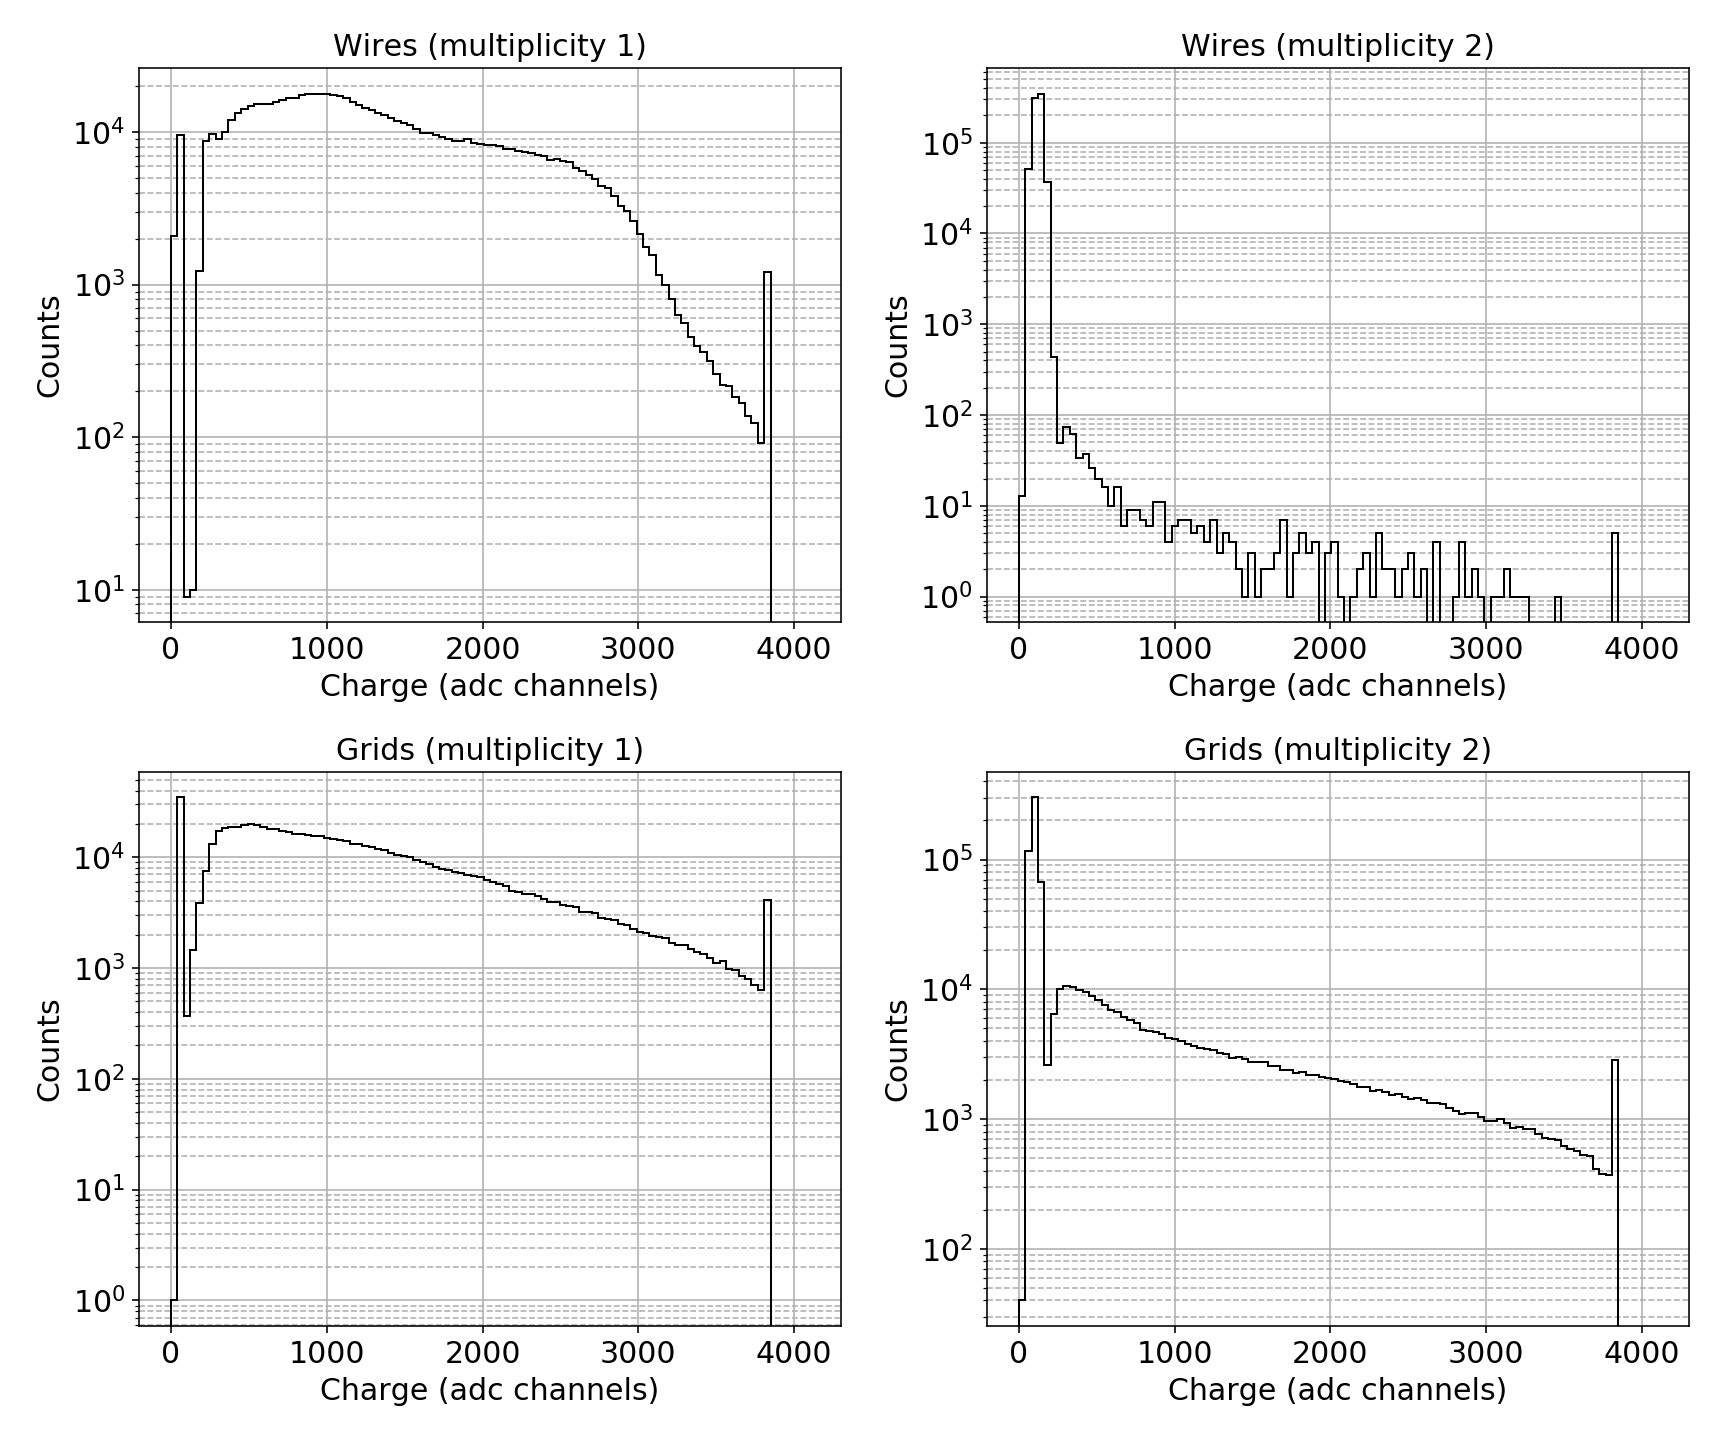

<IPython.core.display.Javascript object>


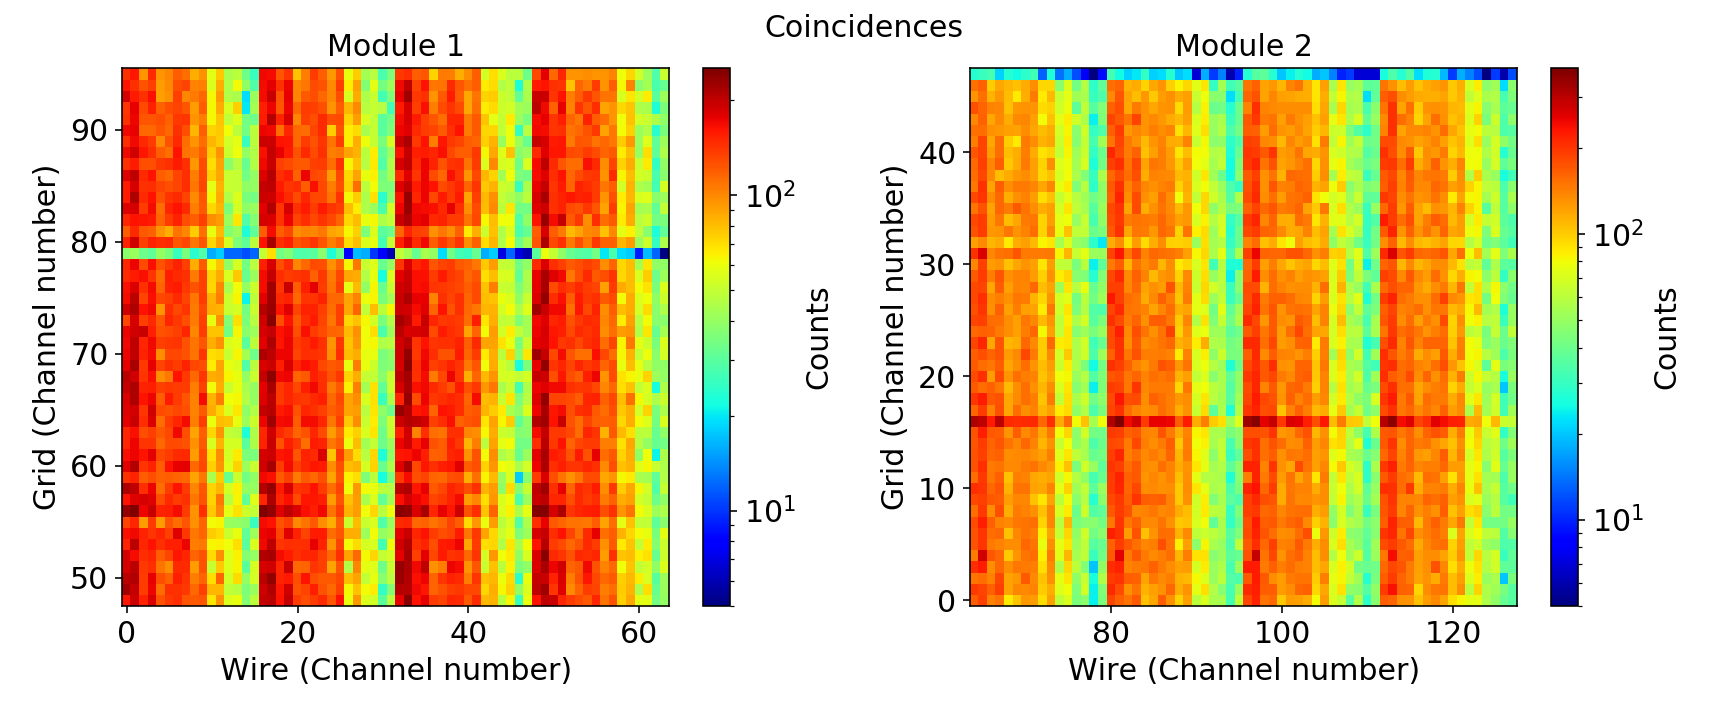

<IPython.core.display.Javascript object>


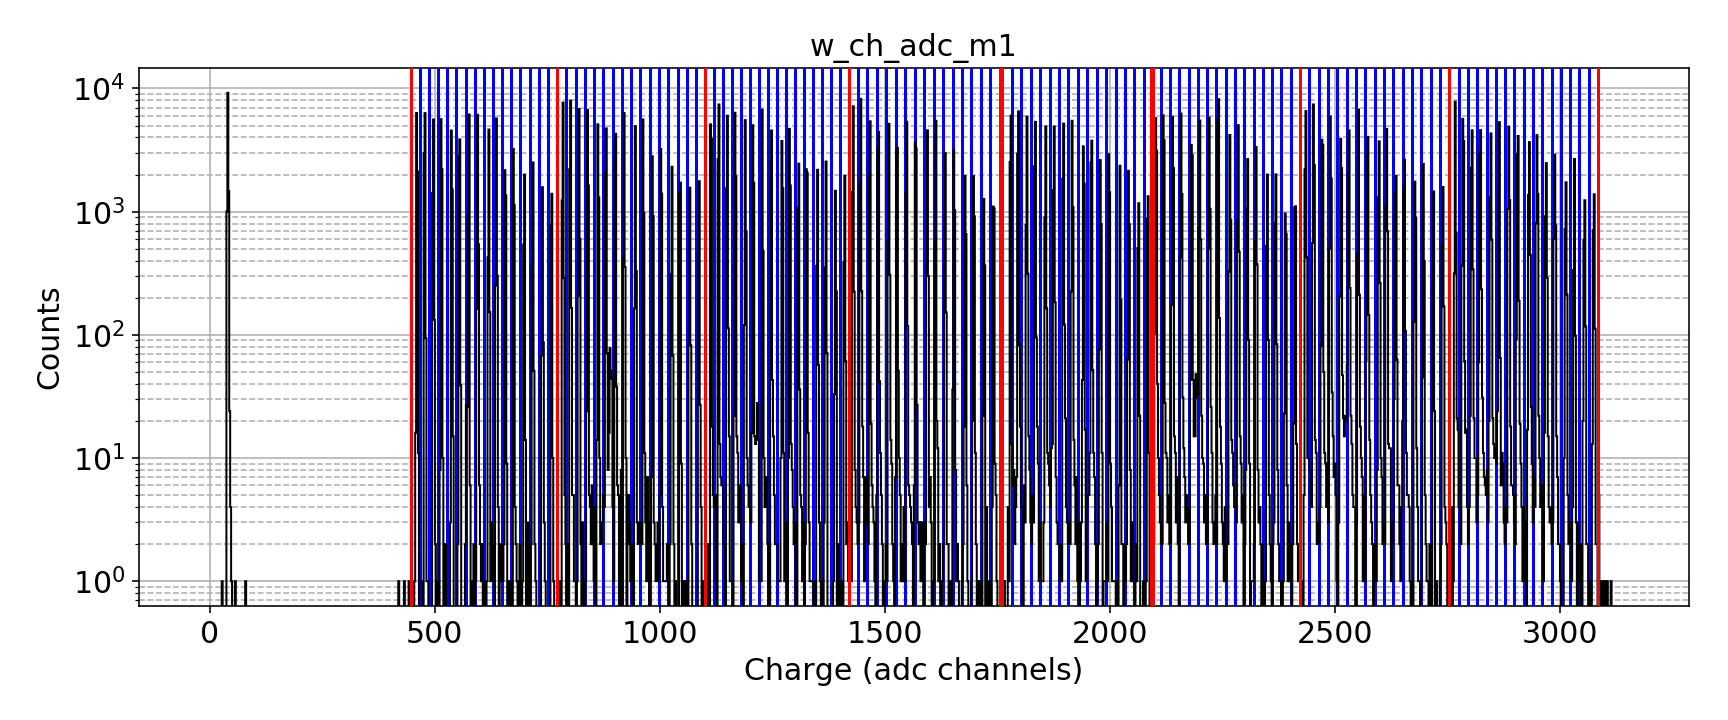

<IPython.core.display.Javascript object>


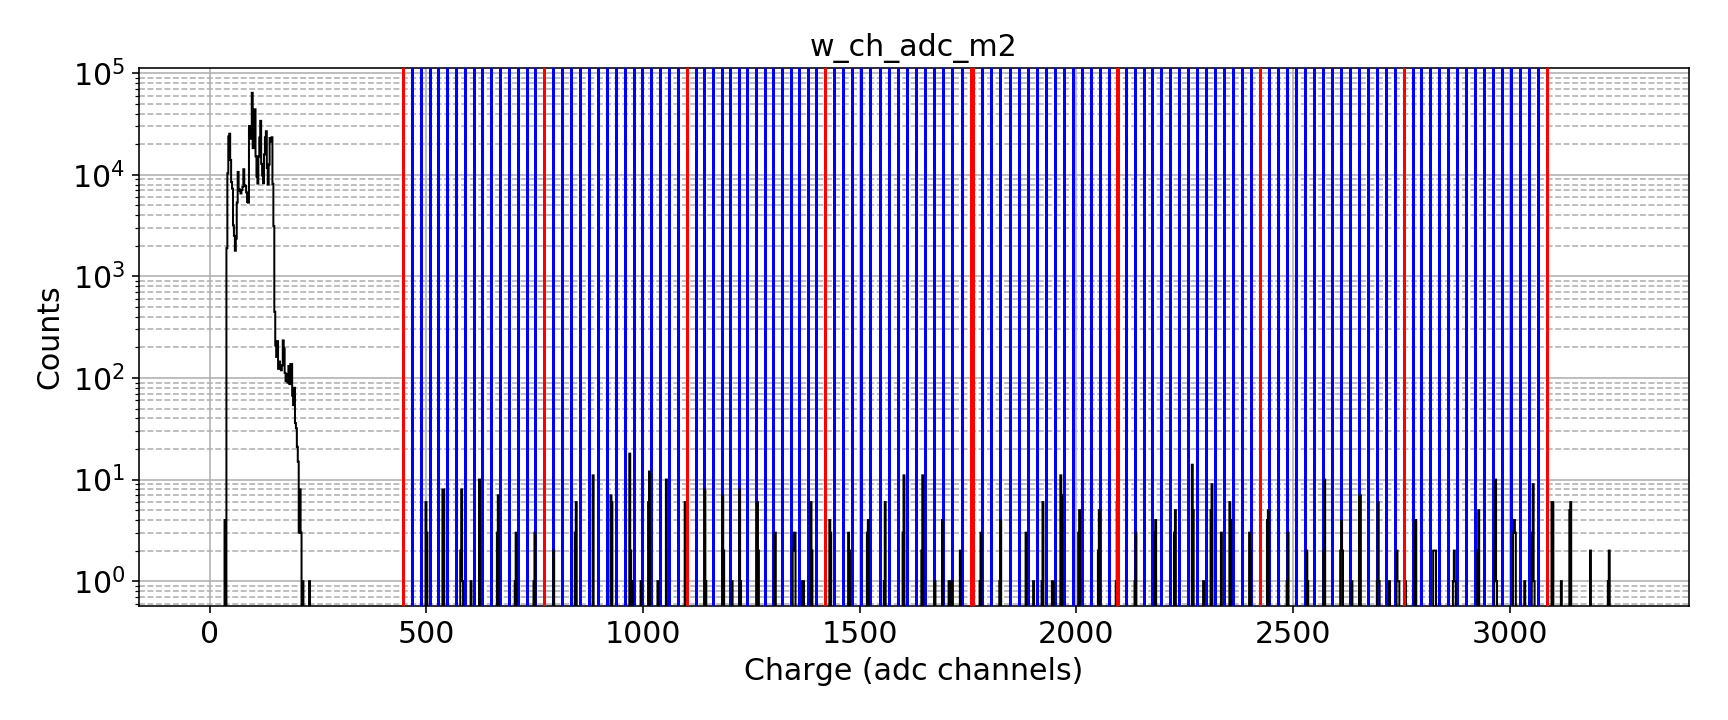

<IPython.core.display.Javascript object>


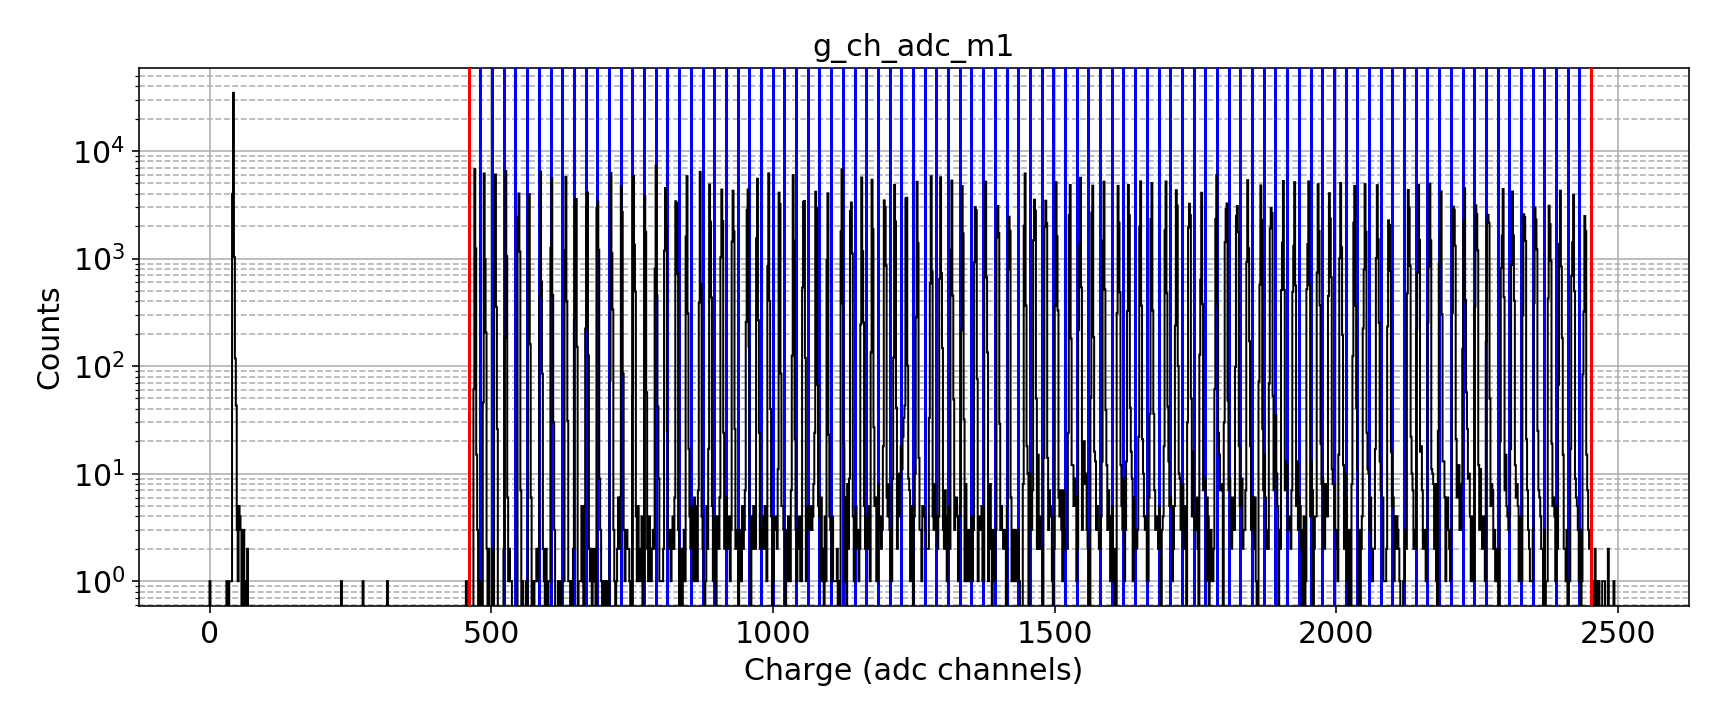

<IPython.core.display.Javascript object>


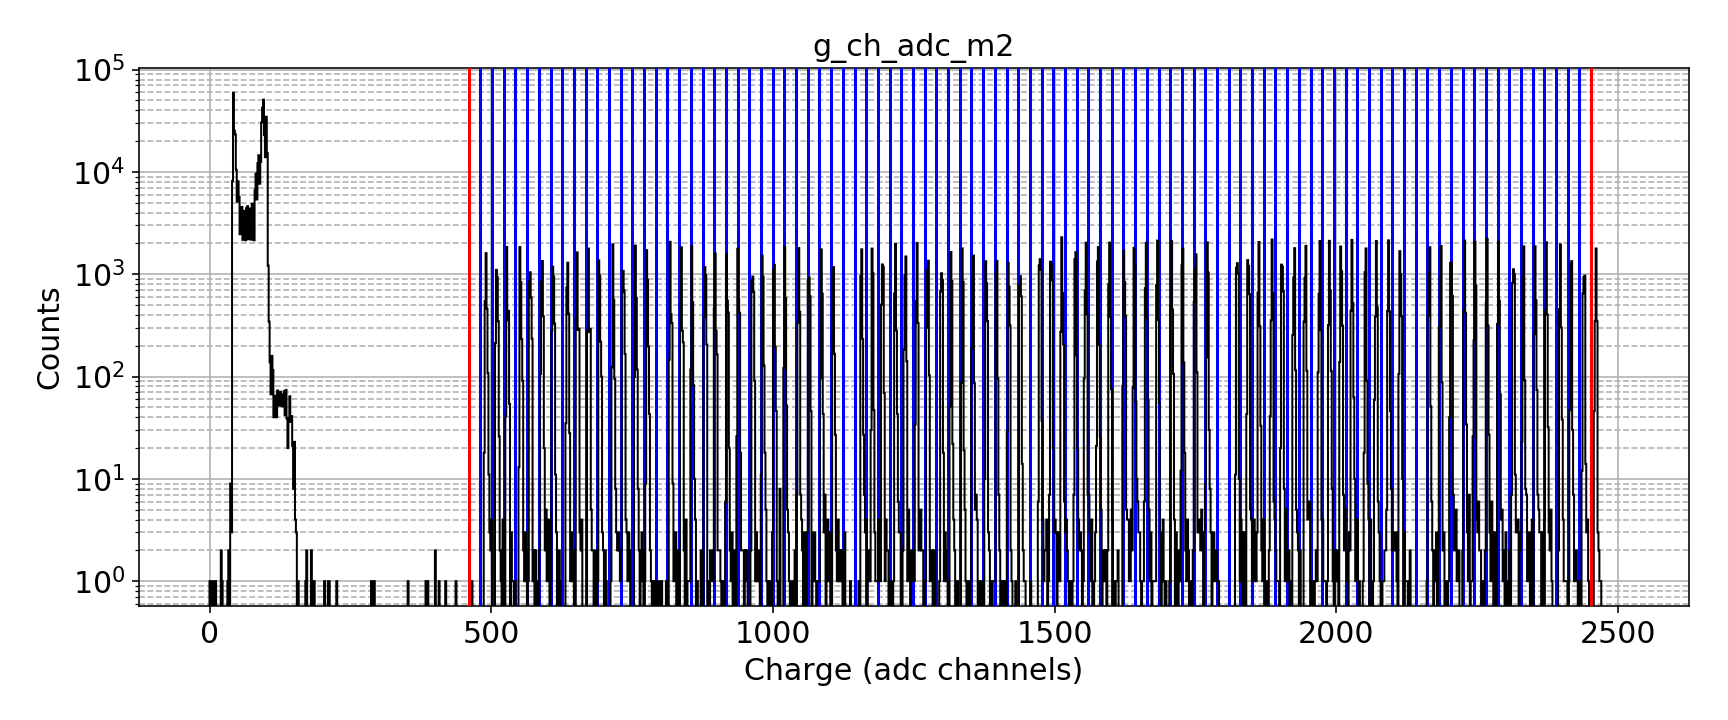

<IPython.core.display.Javascript object>


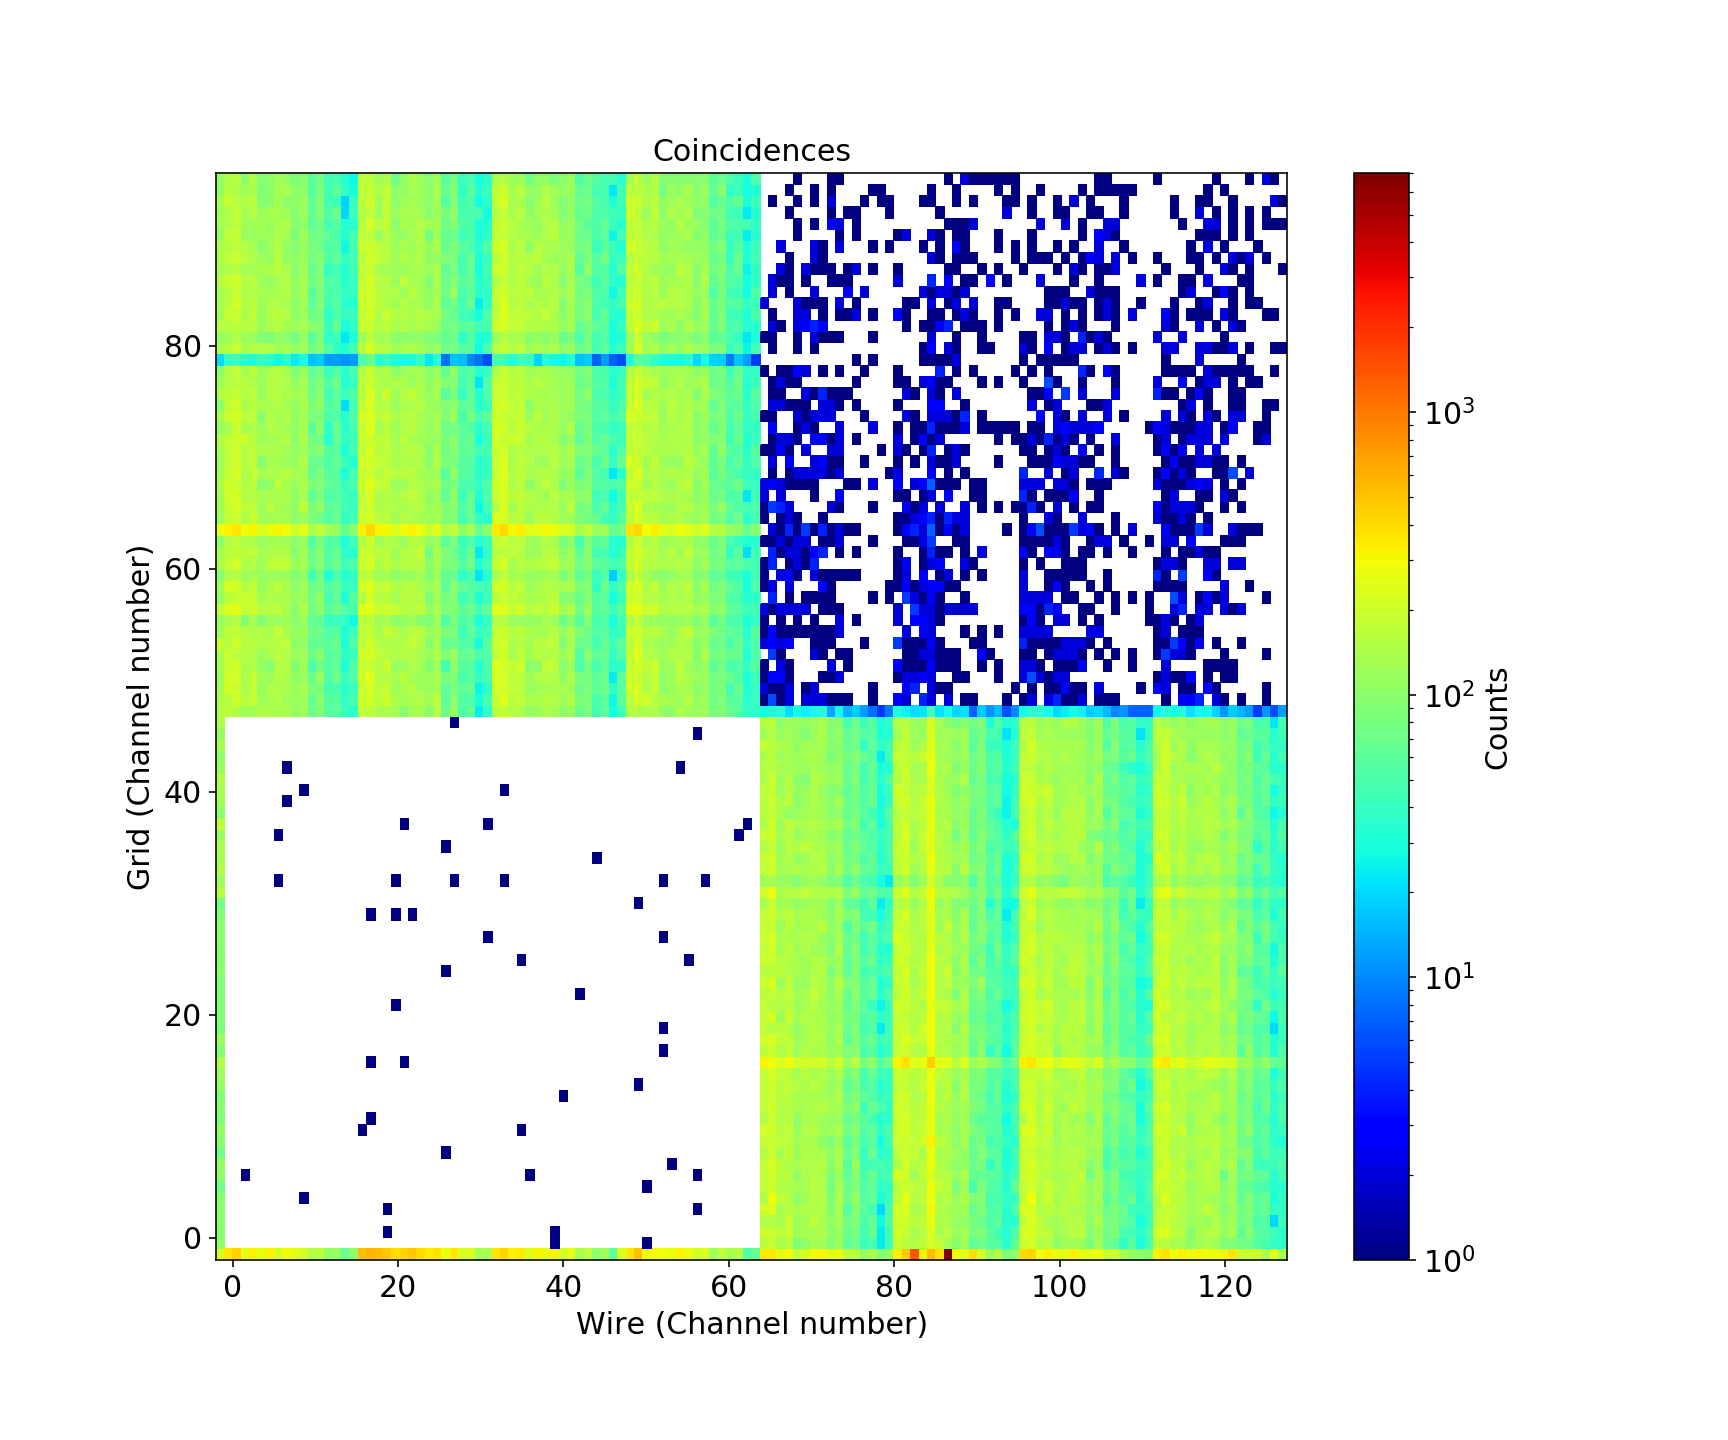

Number of events: 748785.00
Duration: 4.68 hours
Area: 0.19 m^2
Rate: 228.70 Hz/m^2


In [131]:
# Import data and declare parameters
run = 'cncs_run_1'
path = CNCS_PATHS['cncs_run_1']
clusters_unfiltered = cncs_read.extract_clusters(CNCS_PATHS['cncs_run_1'])
df_filter = mg_cncs_filter
area = 0.0225 * 0.0225 * 4 * 48 * 2

# Plot data
plot_basic_cncs(run, path, clusters_unfiltered, df_filter, area)

## cncs_run_2: first test run at Utgård

<IPython.core.display.Javascript object>


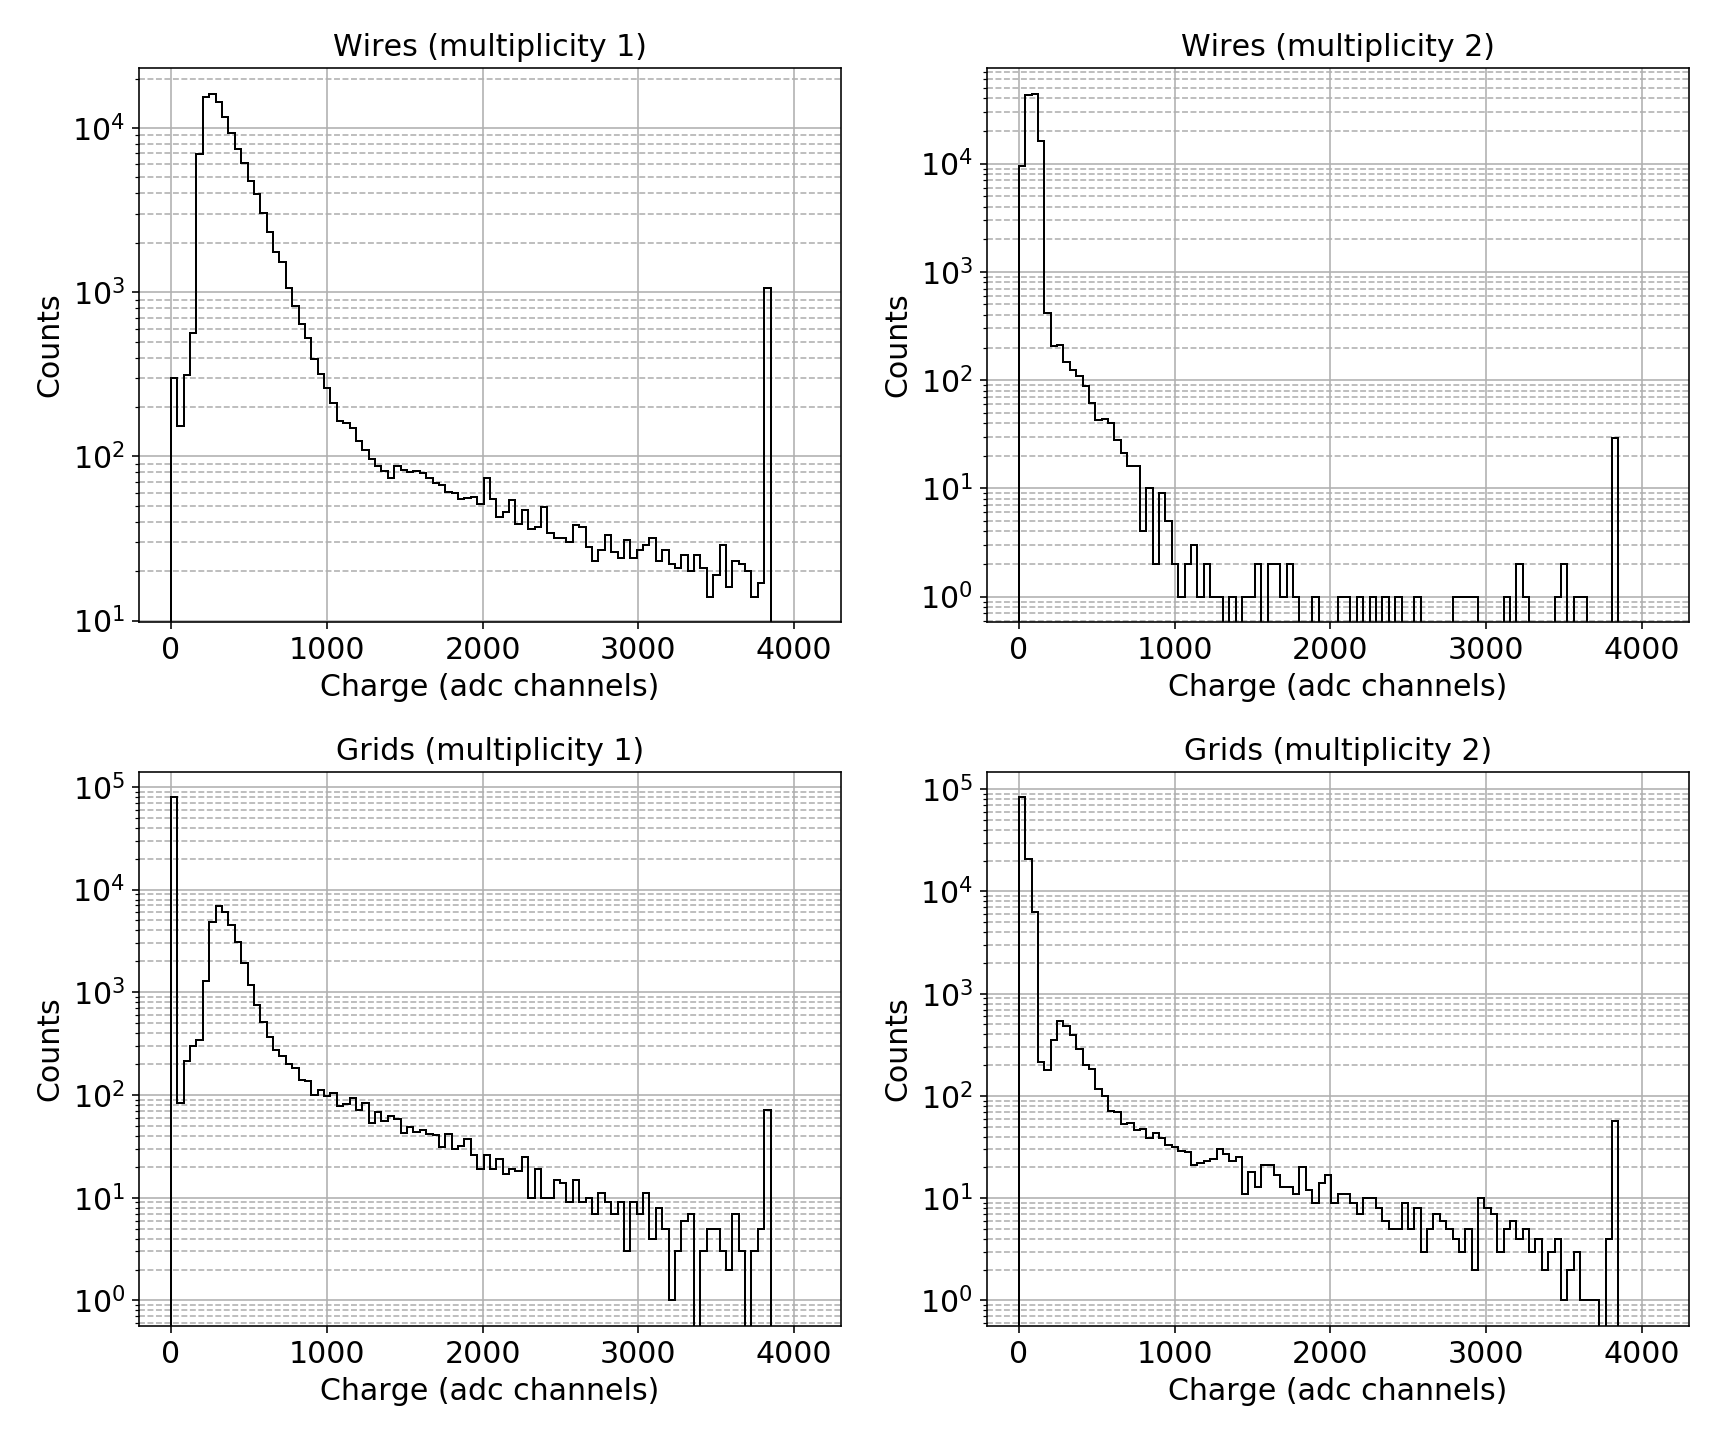

<IPython.core.display.Javascript object>


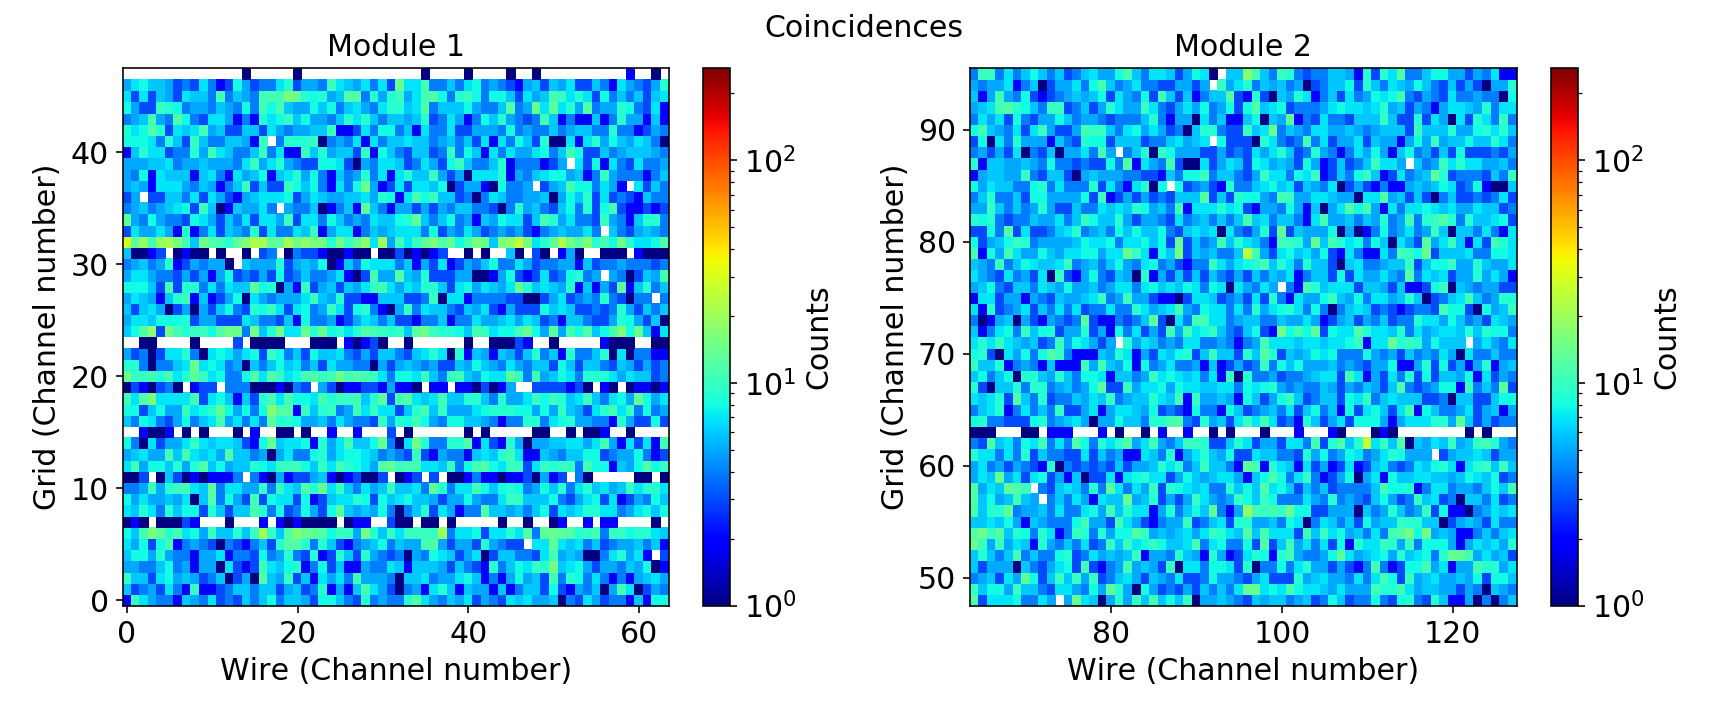

<IPython.core.display.Javascript object>


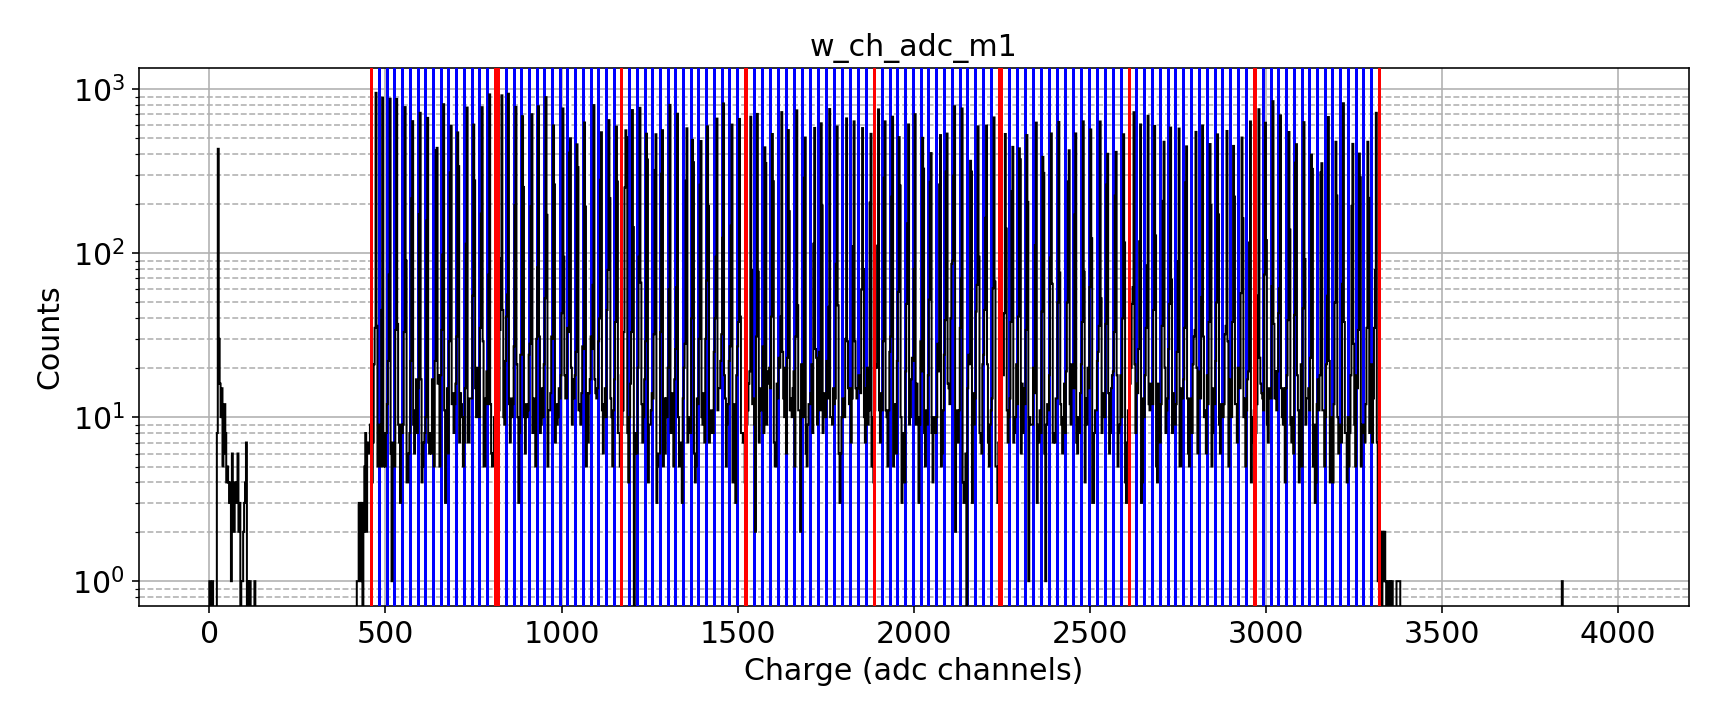

<IPython.core.display.Javascript object>


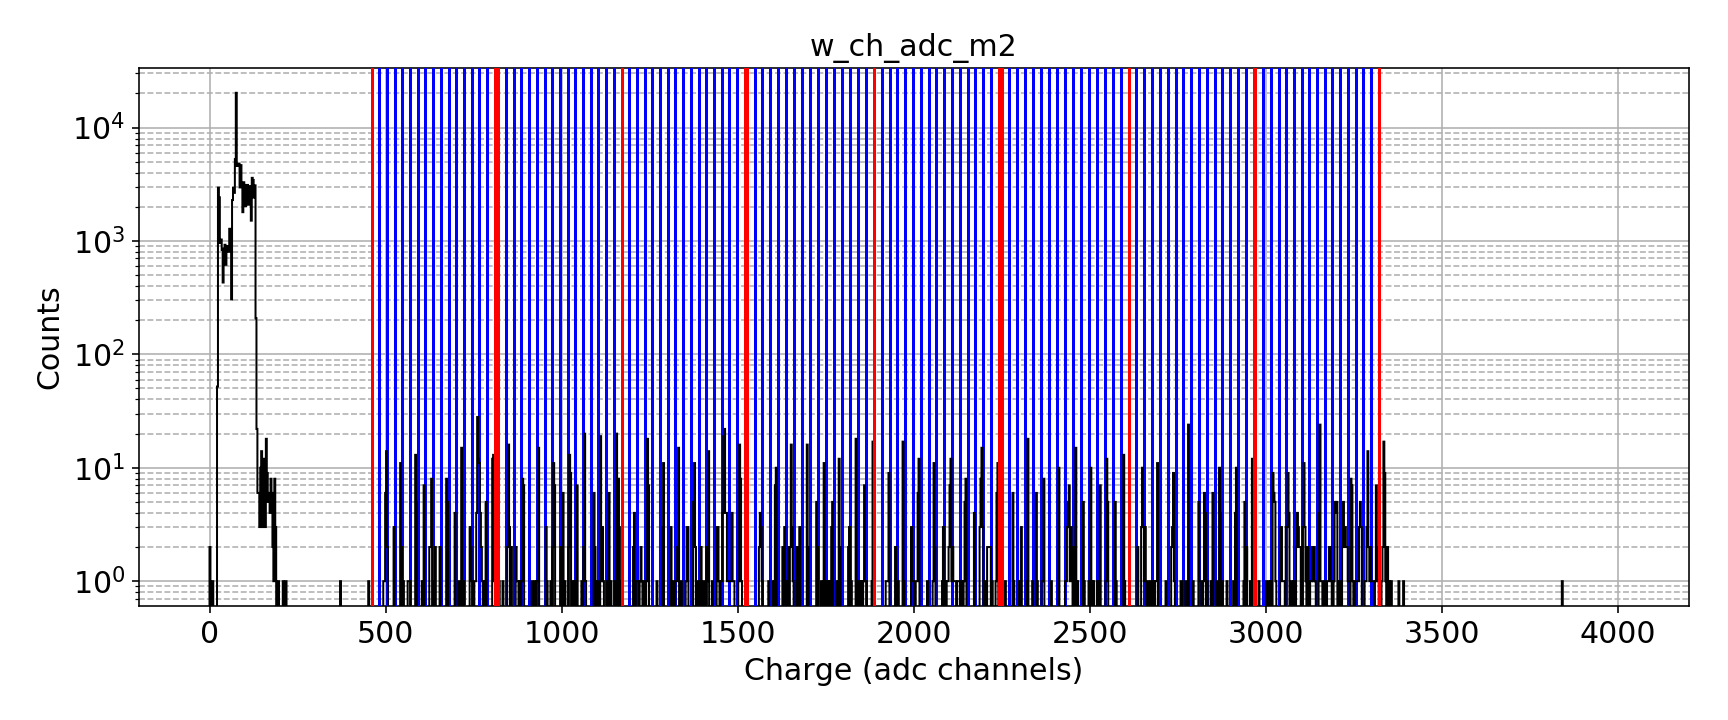

<IPython.core.display.Javascript object>


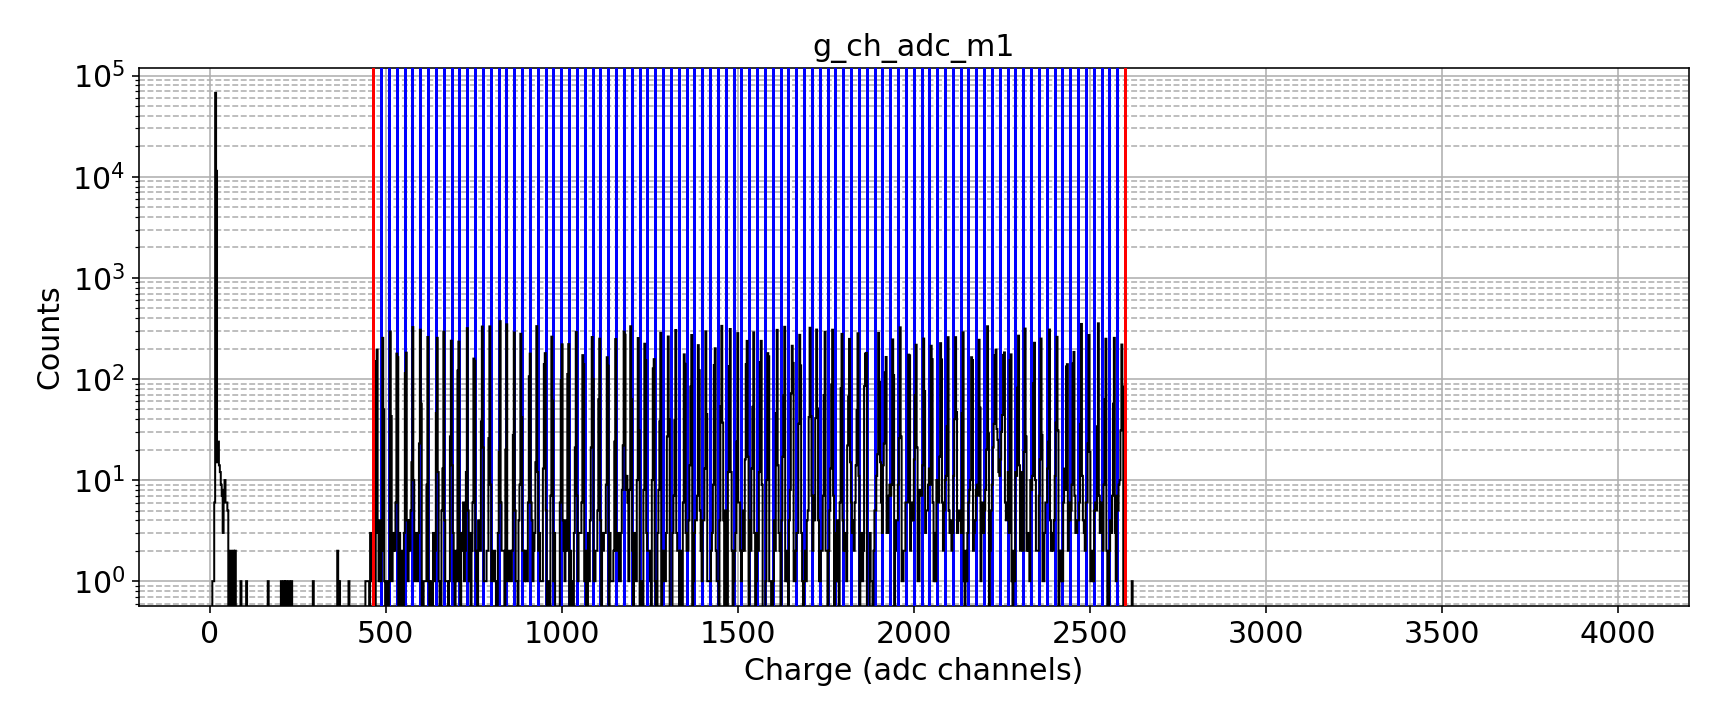

<IPython.core.display.Javascript object>


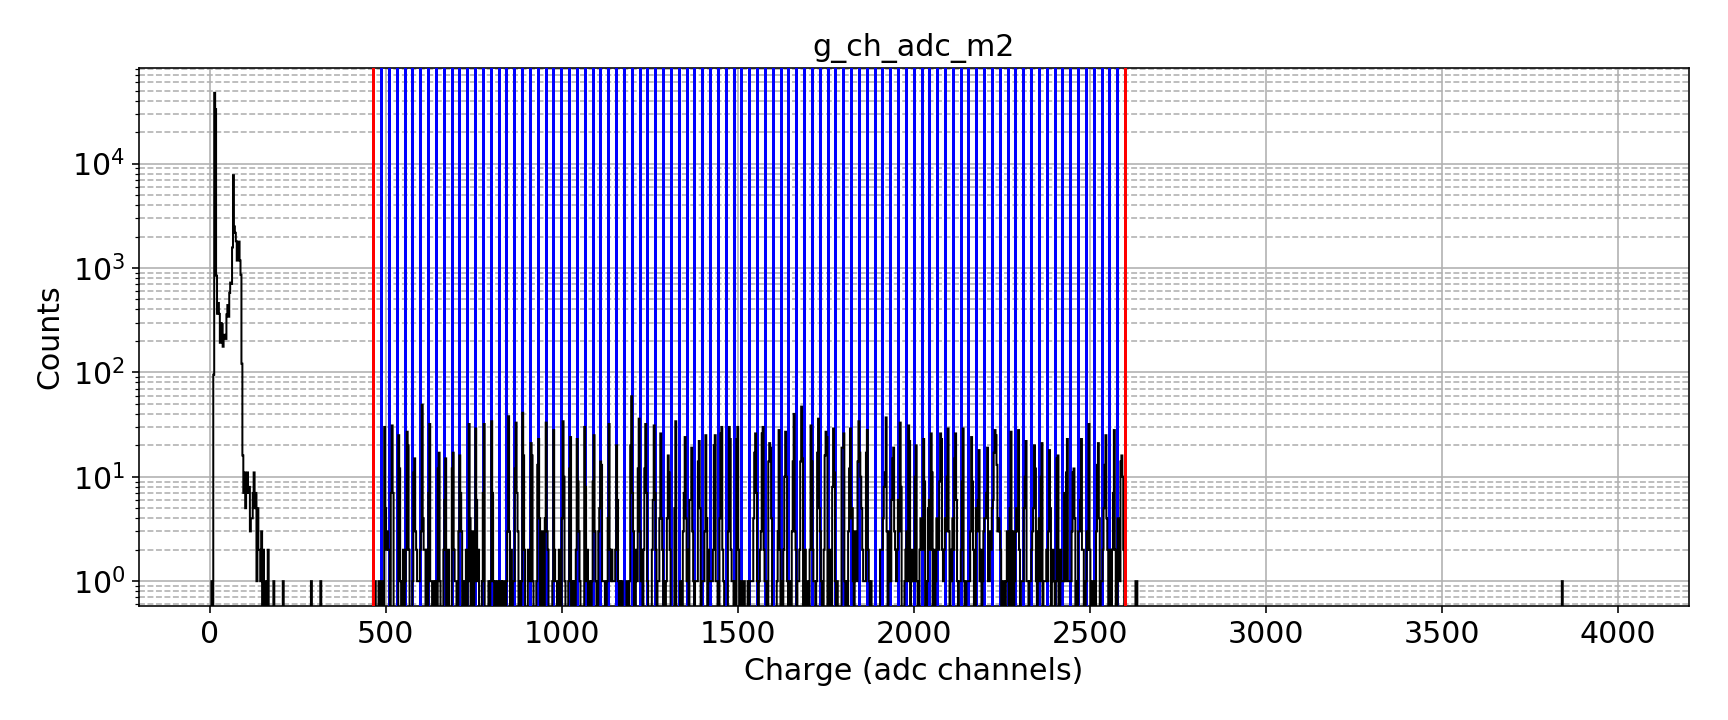

<IPython.core.display.Javascript object>


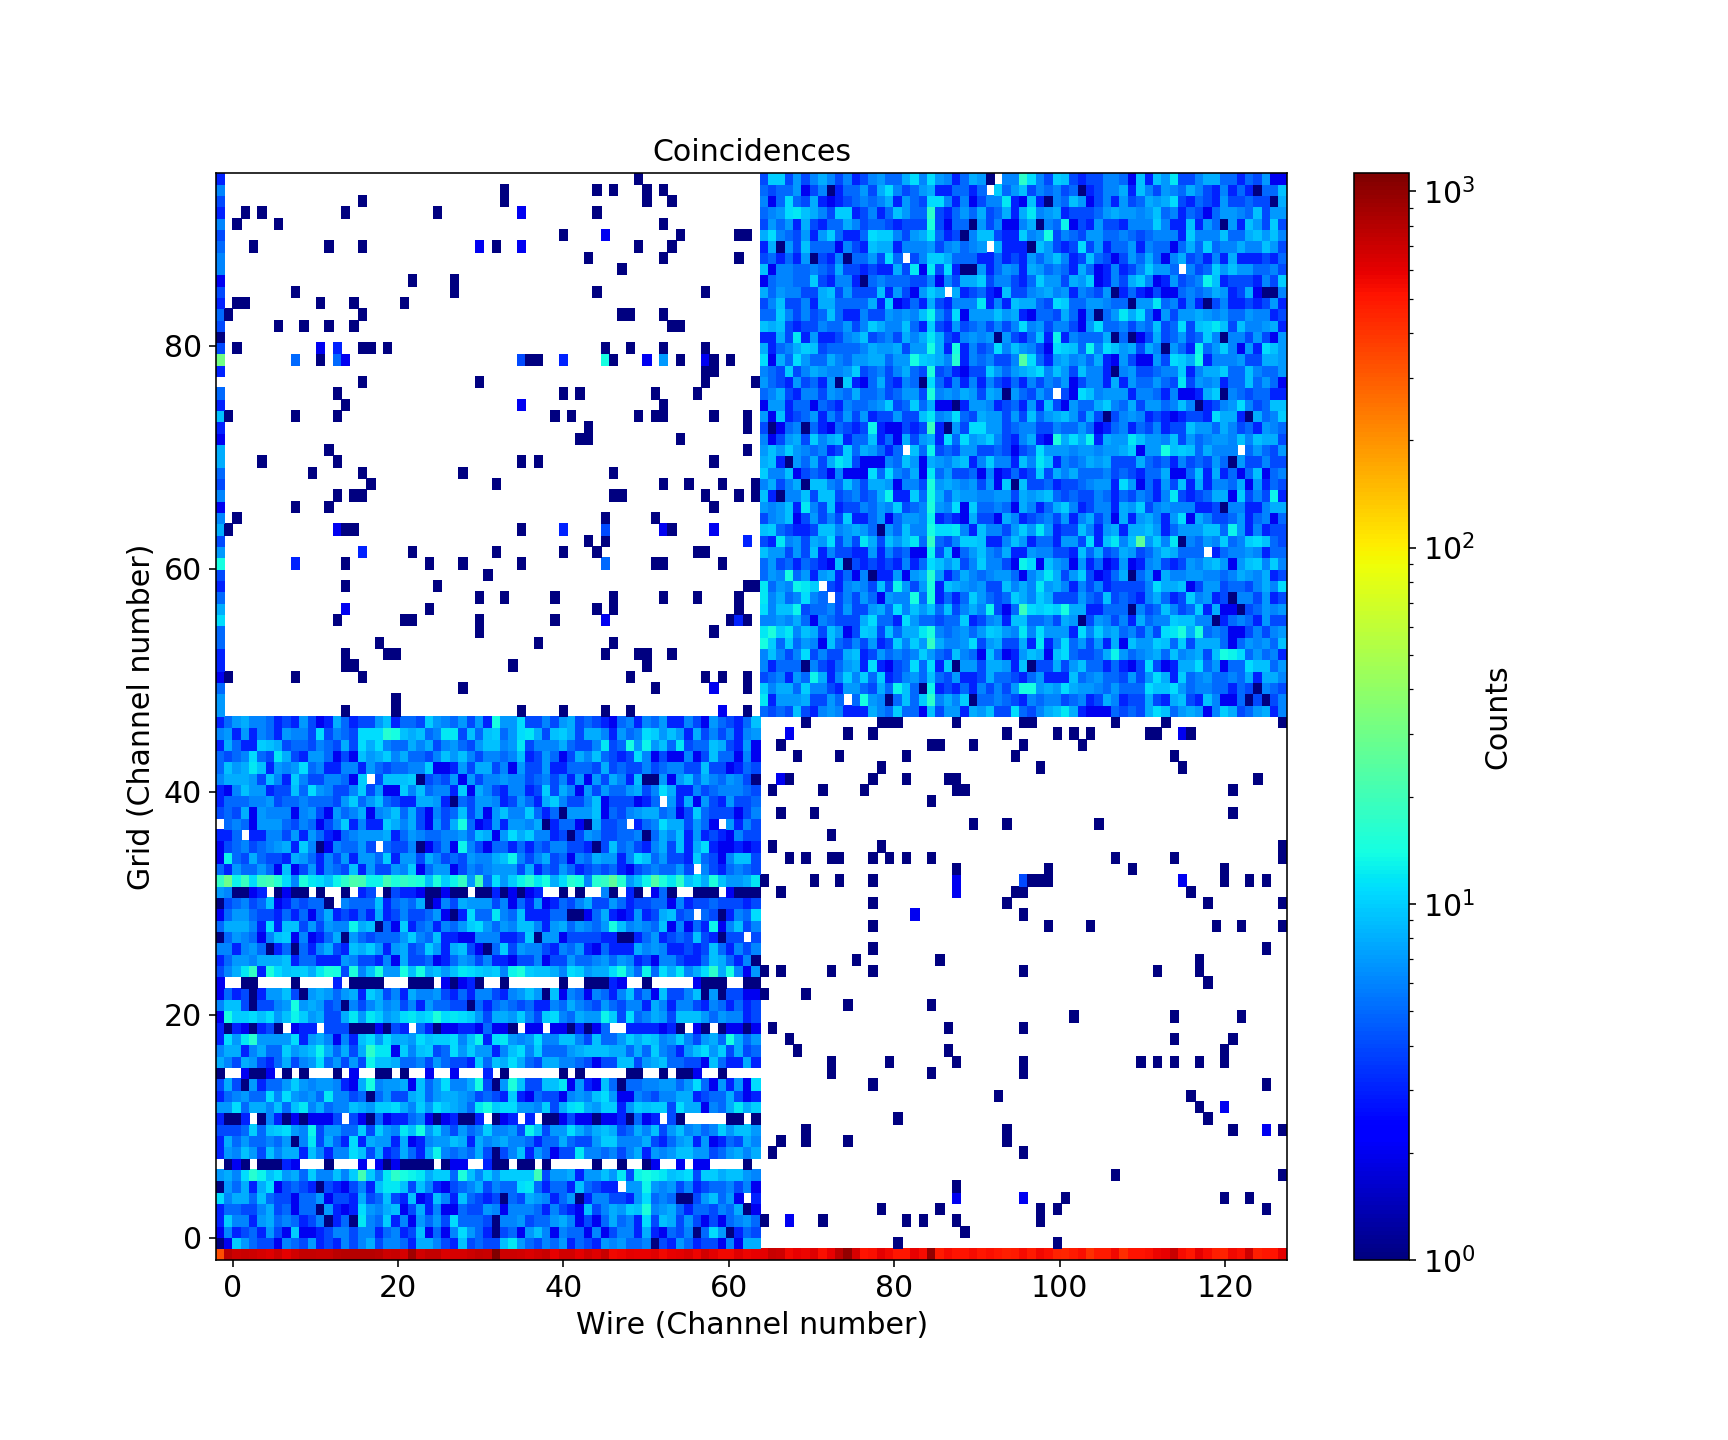

<IPython.core.display.Javascript object>


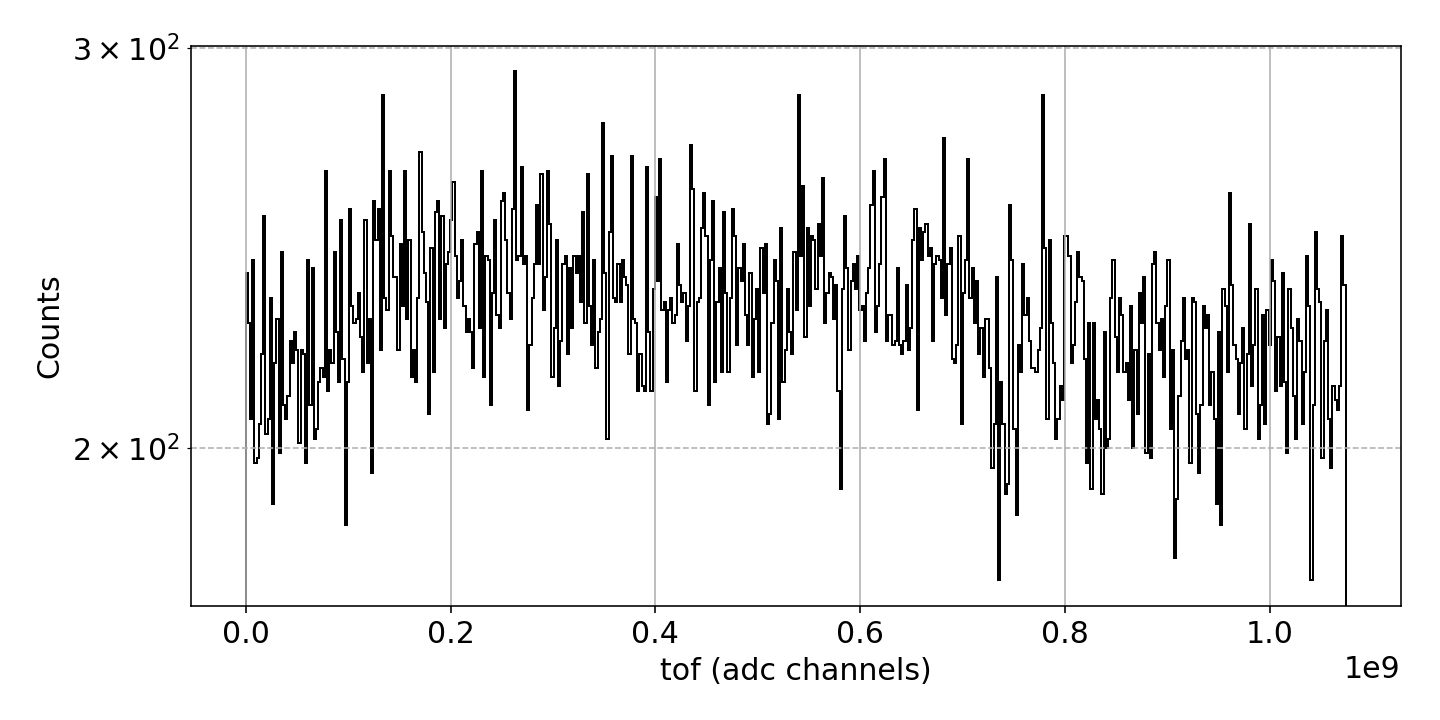

Number of events: 114637.00
Duration: 20.56 hours
Area: 0.19 m^2
Rate: 7.97 Hz/m^2


In [149]:
# Import data and declare parameters
run = 'cncs_run_2'
path = CNCS_PATHS['cncs_run_2']
clusters_unfiltered = cncs_read.extract_clusters(CNCS_PATHS['cncs_run_2'])
df_filter = mg_cncs_filter
area = 0.0225 * 0.0225 * 4 * 48 * 2

# Plot data
plot_basic_cncs(run, path, clusters_unfiltered, df_filter, area)

# 6. V20 - background level

## v20_run_1: shutter down

In [ ]:
area = 0.0225*0.0225*4*36
plot_basic('v20_run_1', clu_v20_run_1, ev_v20_run_1, mg_filter_no_edges_no_back, 0, 2, 1, area)

## v20_run_2: reactor off

In [ ]:
area = 0.0225*0.0225*4*14
plot_basic('v20_run_2', clu_v20_run_2, ev_v20_run_2, mg_filter_no_edges_no_back_no_middle, 0, 2, 1, area)

# 7. Rate comparison

In [ ]:
def get_all_rates(data, df_filter, area):
    measurements = []
    rates = []
    durations = []
    buses = []
    for title, clusters_unfiltered, bus in data:
        duration_temp = (clusters_unfiltered.time.values[-1] - clusters_unfiltered.time.values[0]) * 62.5e-9
        clusters = mg_read.filter_data(clusters_unfiltered, df_filter)
        clusters_bus = clusters[clusters.bus == bus]
        number_events = clusters_bus.shape[0]
        events_per_s_m2 = (number_events/duration_temp)/area
        print('%s, Rate: %.5f Hz/m^2, Duration: %.1f hours' % (title, events_per_s_m2, (duration_temp/(60 ** 2))))
        durations.append((duration_temp/(60 ** 2)))
        rates.append(events_per_s_m2)
        measurements.append(title)
        buses.append(bus)
    
    return measurements, np.array(rates), np.array(durations), buses

In [ ]:
# Define parameters

def get_mean_and_std(rates):
    mean = sum(rates)/len(rates)
    std = np.sqrt((1/len(rates)) * sum(((rates - mean) ** 2)))
    return mean, std

anton_data = [['anton_run_2: 2019-05, SEQ.I, inside cave', clu_anton_run_2, 2],
        ['anton_run_3: 2019-05, SEQ.I, inside cave', clu_anton_run_3, 2],
        ['anton_run_4: 2019-05, SEQ.I, inside cave', clu_anton_run_4, 2],
        ['anton_run_5: 2019-05, SEQ.I, no shielding', clu_anton_run_5, 2],
        ['anton_run_6: 2019-05, SEQ.I, inside cave', clu_anton_run_6, 2],
        ['anton_run_7: 2019-05, SEQ.I, inside cave', clu_anton_run_7, 2],
        ['anton_run_8: 2019-05, SEQ.I, inside cave', clu_anton_run_8, 2],
        ['anton_run_9: 2019-05, SEQ.I, no shielding', clu_anton_run_9, 2],
        ['anton_run_10: 2019-06, SEQ.I, no shielding', clu_anton_run_10, 2],
        ['anton_run_11: 2019-05, SEQ.I, inside cave', clu_anton_run_11, 2],
        ['anton_run_12: 2019-06, SEQ.I, inside cave', clu_anton_run_12, 2],
        ['anton_run_13: 2019-06, SEQ.I, inside cave', clu_anton_run_13, 2],
        ['anton_run_14: 2019-06, SEQ.I, no shielding upright', clu_anton_run_14, 2],
             ]

anton_shielded = [['anton_run_2: 2019-05, SEQ.I, inside cave', clu_anton_run_2, 0],
        ['anton_run_3: 2019-05, SEQ.I, inside cave', clu_anton_run_3, 0],
        ['anton_run_4: 2019-05, SEQ.I, inside cave', clu_anton_run_4, 0],
        ['anton_run_5: 2019-05, SEQ.I, no shielding', clu_anton_run_5, 0],
        ['anton_run_6: 2019-05, SEQ.I, inside cave', clu_anton_run_6, 0],
        ['anton_run_7: 2019-05, SEQ.I, inside cave', clu_anton_run_7, 0],
        ['anton_run_8: 2019-05, SEQ.I, inside cave', clu_anton_run_8, 0],
        ['anton_run_11: 2019-05, SEQ.I, inside cave', clu_anton_run_11, 0],
        ['anton_run_12: 2019-06, SEQ.I, inside cave', clu_anton_run_12, 0],
        ['anton_run_13: 2019-06, SEQ.I, inside cave', clu_anton_run_13, 0],
        
        ['anton_run_2: 2019-05, SEQ.I, inside cave', clu_anton_run_2, 1],
        ['anton_run_3: 2019-05, SEQ.I, inside cave', clu_anton_run_3, 1],
        ['anton_run_4: 2019-05, SEQ.I, inside cave', clu_anton_run_4, 1],
        ['anton_run_5: 2019-05, SEQ.I, no shielding', clu_anton_run_5, 1],
        ['anton_run_6: 2019-05, SEQ.I, inside cave', clu_anton_run_6, 1],
        ['anton_run_7: 2019-05, SEQ.I, inside cave', clu_anton_run_7, 1],
        ['anton_run_8: 2019-05, SEQ.I, inside cave', clu_anton_run_8, 1],
        ['anton_run_11: 2019-05, SEQ.I, inside cave', clu_anton_run_11, 1],
        ['anton_run_12: 2019-06, SEQ.I, inside cave', clu_anton_run_12, 1],
        ['anton_run_13: 2019-06, SEQ.I, inside cave', clu_anton_run_13, 1],
                  
        ['anton_run_2: 2019-05, SEQ.I, inside cave', clu_anton_run_2, 2],
        ['anton_run_3: 2019-05, SEQ.I, inside cave', clu_anton_run_3, 2],
        ['anton_run_4: 2019-05, SEQ.I, inside cave', clu_anton_run_4, 2],
        ['anton_run_5: 2019-05, SEQ.I, no shielding', clu_anton_run_5, 2],
        ['anton_run_6: 2019-05, SEQ.I, inside cave', clu_anton_run_6, 2],
        ['anton_run_7: 2019-05, SEQ.I, inside cave', clu_anton_run_7, 2],
        ['anton_run_8: 2019-05, SEQ.I, inside cave', clu_anton_run_8, 2],
        ['anton_run_11: 2019-05, SEQ.I, inside cave', clu_anton_run_11, 2],
        ['anton_run_12: 2019-06, SEQ.I, inside cave', clu_anton_run_12, 2],
        ['anton_run_13: 2019-06, SEQ.I, inside cave', clu_anton_run_13, 2],
             ]

anton_unshielded = [
        ['anton_run_5: 2019-05, SEQ.I, no shielding', clu_anton_run_5, 0],
        ['anton_run_9: 2019-05, SEQ.I, no shielding', clu_anton_run_9, 0],
        ['anton_run_10: 2019-06, SEQ.I, no shielding', clu_anton_run_10, 0],
    
        ['anton_run_5: 2019-05, SEQ.I, no shielding', clu_anton_run_5, 1],
        ['anton_run_9: 2019-05, SEQ.I, no shielding', clu_anton_run_9, 1],
        ['anton_run_10: 2019-06, SEQ.I, no shielding', clu_anton_run_10, 1],
    
        ['anton_run_5: 2019-05, SEQ.I, no shielding', clu_anton_run_5, 2],
        ['anton_run_9: 2019-05, SEQ.I, no shielding', clu_anton_run_9, 2],
        ['anton_run_10: 2019-06, SEQ.I, no shielding', clu_anton_run_10, 2],
             ]


utgard_data = [
        ['previous_run_5: 2019-11, SEQ.I, unshielded', clu_previous_run_5, 2],
        ['previous_run_6: 2019-11, SEQ.I, mirrobor shielding', clu_previous_run_6, 2],
        ['previous_run_8: 2019-12, SEQ.I, inside new cave', clu_previous_run_8, 2],
        ['utgard_run_2: 2020-03, SEQ.I, mirrobor shielding', clu_utgard_run_2, 2],
        ['utgard_run_3: 2020-03, SEQ.I, unshielded', clu_utgard_run_3, 2],
        
        #['2019-12, SEQ.II, polyethylene+mirrobor shielding', clu_previous_run_7, 0],
        ['utgard_run_2: 2020-03, SEQ.II, mirrobor shielding', clu_utgard_run_2, 0],
        ['utgard_run_3: 2020-03, SEQ.II, unshielded', clu_utgard_run_3, 0],
        ]

df_filter = mg_filter_no_edges
area = 0.0225 * 0.0225 * 4 * 36

# Run rate script
print('----- ANTON, shielded -----')
measurements, rates, durations, buses = get_all_rates(anton_shielded, df_filter, area)
fig = go.Figure(data=[go.Table(header=dict(values=['Measurement', 'Bus', 'Rate (Hz/m2)', 'Duration (hours)']),
                               cells=dict(values=[measurements, buses, rates, durations]))
                     ])
fig.show()
anton_shielded_mean, anton_shielded_std = get_mean_and_std(rates)
print('Anton shielded summary: ')
print('Mean: %f' % anton_shielded_mean)
print('Std: %f' % anton_shielded_std)

print('----- ANTON, unshielded -----')
measurements, rates, durations, buses = get_all_rates(anton_unshielded, df_filter, area)
fig = go.Figure(data=[go.Table(header=dict(values=['Measurement', 'Bus', 'Rate (Hz/m2)', 'Duration (hours)']),
                               cells=dict(values=[measurements, buses, rates, durations]))
                     ])
fig.show()
anton_unshielded_mean, anton_unshielded_std = get_mean_and_std(rates)                 
print('Anton unshielded summary: ')
print('Mean: %f' % anton_unshielded_mean)
print('Std: %f' % anton_unshielded_std)            
                  
print('----- RAMSEY & ALEX -----')
measurements, rates, durations, buses = get_all_rates(utgard_data, df_filter, area)
fig = go.Figure(data=[go.Table(header=dict(values=['Measurement', 'Bus', 'Rate (Hz/m2)', 'Duration (hours)']),
                               cells=dict(values=[measurements, buses, rates, durations]))
                     ])
fig.show()

# 7. PHS comparison

## No shielding, horisontal: Anton & Ramsey+Alex overlaid

In [ ]:
%matplotlib notebook
# Define parameters
number_bins = 300
df_filter = mg_filter_no_edges_no_back_no_middle

# Plot
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(4)

# Ramsey & Alex data
duration_ra = (clu_utgard_run_3.time.values[-1] - clu_utgard_run_3.time.values[0]) * 62.5e-9
clu_ra_filtered = mg_read.filter_data(clu_utgard_run_3, df_filter)
clu_ra_bus = clu_ra_filtered[clu_ra_filtered.bus == 2]

# Anton data
duration_a = (clu_anton_run_5.time.values[-1] - clu_anton_run_5.time.values[0]) * 62.5e-9
clu_a_filtered = mg_read.filter_data(clu_anton_run_5, df_filter)
clu_a_bus = clu_a_filtered[clu_a_filtered.bus == 2]

# Wires
plt.subplot(1, 2, 1)
plt.hist(clu_ra_bus.wadc, bins=number_bins, histtype='step',
         zorder=5, range=[0, 5000], label='Utgård 2+3 (hor.)', color='blue',
         weights=(1/duration_ra)*np.ones(len(clu_ra_bus.wadc)))

plt.hist(clu_a_bus.wadc, bins=number_bins, histtype='step',
         zorder=5, range=[0, 5000], label='Utgård 1 (hor.)', color='red',
         weights=(1/duration_a)*np.ones(len(clu_a_bus.wadc)))

plt.grid(True, which='major', linestyle='--', zorder=0)
plt.grid(True, which='minor', linestyle='--', zorder=0)
plt.legend(title='Data')
plt.title('Wires')
plt.xlabel('Charge (ADC channels)')
plt.ylabel('Counts/s')
plt.yscale('log')
fig.show()

# Save data
output_path = '../output/wires_hor_overlaid_phs.pdf'
fig.savefig(output_path, bbox_inches='tight')



# Grids
plt.subplot(1, 2, 2)

plt.hist(clu_ra_bus.gadc, bins=number_bins, histtype='step',
         zorder=5, range=[0, 10000], label='Utgård 2+3 (hor.)', color='blue',
         weights=(1/duration_ra)*np.ones(len(clu_ra_bus.wadc)))

plt.hist(clu_a_bus.gadc, bins=number_bins, histtype='step',
         zorder=5, range=[0, 10000], label='Utgård 1 (hor.)', color='red',
         weights=(1/duration_a)*np.ones(len(clu_a_bus.wadc)))

plt.grid(True, which='major', linestyle='--', zorder=0)
plt.grid(True, which='minor', linestyle='--', zorder=0)
plt.legend(title='Data')
plt.title('Grids')
plt.xlabel('Charge (ADC channels)')
plt.ylabel('Counts/s')
plt.yscale('log')
fig.suptitle('Filtered')
fig.show()

# Save data
output_path = '../output/grids_hor_overlaid_phs.pdf'
fig.savefig(output_path, bbox_inches='tight')

In [ ]:
%matplotlib notebook
# Define parameters
number_bins = 300
df_filter = mg_filter_no_edges_no_back_no_middle

# Plot
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(4)

# Ramsey & Alex data
duration_ra = (clu_utgard_run_3.time.values[-1] - clu_utgard_run_3.time.values[0]) * 62.5e-9
clu_ra_bus = clu_utgard_run_3[clu_utgard_run_3.bus == 2]

# Anton data
duration_a = (clu_anton_run_5.time.values[-1] - clu_anton_run_5.time.values[0]) * 62.5e-9
clu_a_bus = clu_anton_run_5[clu_anton_run_5.bus == 2]

# Wires
plt.subplot(1, 2, 1)
plt.hist(clu_ra_bus.wadc, bins=number_bins, histtype='step',
         zorder=5, range=[0, 8000], label='Ugård 2+3', color='blue',
         weights=(1/duration_ra)*np.ones(len(clu_ra_bus.wadc)))

plt.hist(clu_a_bus.wadc, bins=number_bins, histtype='step',
         zorder=5, range=[0, 8000], label='Utgård 1', color='red',
         weights=(1/duration_a)*np.ones(len(clu_a_bus.wadc)))

plt.grid(True, which='major', linestyle='--', zorder=0)
plt.grid(True, which='minor', linestyle='--', zorder=0)
plt.legend(title='Data')
plt.title('Wires')
plt.xlabel('Charge (ADC channels)')
plt.ylabel('Counts/s')
plt.yscale('log')
fig.show()


# Grids
plt.subplot(1, 2, 2)

plt.hist(clu_ra_bus.gadc, bins=number_bins, histtype='step',
         zorder=5, range=[0, 8000], label='Ramsey & Alex', color='blue',
         weights=(1/duration_ra)*np.ones(len(clu_ra_bus.wadc)))

plt.hist(clu_a_bus.gadc, bins=number_bins, histtype='step',
         zorder=5, range=[0, 8000], label='Anton', color='red',
         weights=(1/duration_a)*np.ones(len(clu_a_bus.wadc)))

plt.grid(True, which='major', linestyle='--', zorder=0)
plt.grid(True, which='minor', linestyle='--', zorder=0)
plt.legend(title='Data')
plt.title('Grids')
plt.xlabel('Charge (ADC channels)')
plt.ylabel('Counts/s')
plt.yscale('log')
fig.suptitle('Unfiltered')
fig.show()

## No shielding: Anton (vertical) & Ramsey+Alex (horisontal) overlaid

In [ ]:
%matplotlib notebook
# Define parameters
number_bins = 300
df_filter = mg_filter_no_edges_no_back_no_middle

# Plot
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(4)

# Ramsey & Alex data
duration_ra = (clu_utgard_run_3.time.values[-1] - clu_utgard_run_3.time.values[0]) * 62.5e-9
clu_ra_filtered = mg_read.filter_data(clu_utgard_run_3, df_filter)
clu_ra_bus = clu_ra_filtered[clu_ra_filtered.bus == 2]

# Anton data
duration_a = (clu_anton_run_14.time.values[-1] - clu_anton_run_14.time.values[0]) * 62.5e-9
clu_a_filtered = mg_read.filter_data(clu_anton_run_14, df_filter)
clu_a_bus = clu_a_filtered[clu_a_filtered.bus == 2]

# Wires
plt.subplot(1, 2, 1)
plt.hist(clu_ra_bus.wadc, bins=number_bins, histtype='step',
         zorder=5, range=[0, 5000], label='Utgård 2+3 (hor.)', color='blue',
         weights=(1/duration_ra)*np.ones(len(clu_ra_bus.wadc)))

plt.hist(clu_a_bus.wadc, bins=number_bins, histtype='step',
         zorder=5, range=[0, 5000], label='Utgård 1 (ver.)', color='green',
         weights=(1/duration_a)*np.ones(len(clu_a_bus.wadc)))

plt.grid(True, which='major', linestyle='--', zorder=0)
plt.grid(True, which='minor', linestyle='--', zorder=0)
plt.legend(title='Data')
plt.title('Wires')
plt.xlabel('Charge (ADC channels)')
plt.ylabel('Counts/s')
plt.yscale('log')
fig.show()


# Grids
plt.subplot(1, 2, 2)

plt.hist(clu_ra_bus.gadc, bins=number_bins, histtype='step',
         zorder=5, range=[0, 10000], label='Utgård 2+3 (hor.)', color='blue',
         weights=(1/duration_ra)*np.ones(len(clu_ra_bus.wadc)))

plt.hist(clu_a_bus.gadc, bins=number_bins, histtype='step',
         zorder=5, range=[0, 10000], label='Utgård 1 (ver.)', color='green',
         weights=(1/duration_a)*np.ones(len(clu_a_bus.wadc)))

plt.grid(True, which='major', linestyle='--', zorder=0)
plt.grid(True, which='minor', linestyle='--', zorder=0)
plt.legend(title='Data')
plt.title('Grids')
plt.xlabel('Charge (ADC channels)')
plt.ylabel('Counts/s')
plt.yscale('log')
fig.suptitle('Filtered')
fig.show()

# Save data
output_path = '../output/grids_ver_overlaid_phs.pdf'
fig.savefig(output_path, bbox_inches='tight')

In [ ]:
%matplotlib notebook
# Define parameters
number_bins = 300
df_filter = mg_filter_no_edges_no_back_no_middle

# Plot
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(4)

# Ramsey & Alex data
duration_ra = (clu_utgard_run_3.time.values[-1] - clu_utgard_run_3.time.values[0]) * 62.5e-9
clu_ra_bus = clu_utgard_run_3[clu_utgard_run_3.bus == 2]

# Anton data
duration_a = (clu_anton_run_14.time.values[-1] - clu_anton_run_14.time.values[0]) * 62.5e-9
clu_a_bus = clu_anton_run_14[clu_anton_run_14.bus == 2]

# Wires
plt.subplot(1, 2, 1)
plt.hist(clu_ra_bus.wadc, bins=number_bins, histtype='step',
         zorder=5, range=[0, 8000], label='Utgård 2+3', color='blue',
         weights=(1/duration_ra)*np.ones(len(clu_ra_bus.wadc)))

plt.hist(clu_a_bus.wadc, bins=number_bins, histtype='step',
         zorder=5, range=[0, 8000], label='Utgård 1', color='red',
         weights=(1/duration_a)*np.ones(len(clu_a_bus.wadc)))

plt.grid(True, which='major', linestyle='--', zorder=0)
plt.grid(True, which='minor', linestyle='--', zorder=0)
plt.legend(title='Data')
plt.title('Wires')
plt.xlabel('Charge (ADC channels)')
plt.ylabel('Counts/s')
plt.yscale('log')
fig.show()


# Grids
plt.subplot(1, 2, 2)

plt.hist(clu_ra_bus.gadc, bins=number_bins, histtype='step',
         zorder=5, range=[0, 8000], label='Ramsey & Alex', color='blue',
         weights=(1/duration_ra)*np.ones(len(clu_ra_bus.wadc)))

plt.hist(clu_a_bus.gadc, bins=number_bins, histtype='step',
         zorder=5, range=[0, 8000], label='Anton', color='red',
         weights=(1/duration_a)*np.ones(len(clu_a_bus.wadc)))

plt.grid(True, which='major', linestyle='--', zorder=0)
plt.grid(True, which='minor', linestyle='--', zorder=0)
plt.legend(title='Data')
plt.title('Grids')
plt.xlabel('Charge (ADC channels)')
plt.ylabel('Counts/s')
plt.yscale('log')
fig.suptitle('Unfiltered')
fig.show()

# Animations

In [ ]:
def create_animation(run, clusters_unfiltered, bus, area, df_filter, interval):
    # Create folder for animation
    animation_folder = '../output/animation/'
    shutil.rmtree(animation_folder, ignore_errors=True)
    mg_hf.mkdir_p(animation_folder)

    # Set tick size
    mg_hf.set_thick_labels(12)

    # Filter clusters
    clusters = mg_read.filter_data(clusters_unfiltered, df_filter)
    
    # Declare parameters
    min_time_in_hours = (clusters_unfiltered.time.values[0] * 62.5e-9) * (1/(60**2))
    max_time_in_hours = (clusters_unfiltered.time.values[-1] * 62.5e-9) * (1/(60**2))

    # Only keep one bus
    clusters_bus_full = clusters[clusters.bus == bus]
    clusters_bus_uf_full = clusters_unfiltered[clusters_unfiltered.bus == bus]

    # Define function to plot one frame
    def plot_frame(time, interval, clusters_bus_full, clusters_bus_uf_full):
        # Filter bus clusters on time, +/- interval hours
        start_time = ((time-interval) * (60**2))/(62.5e-9)
        stop_time = ((time+interval) * (60**2))/(62.5e-9)
        clusters_bus = clusters_bus_full[(clusters_bus_full.time >= start_time) &
                                         (clusters_bus_full.time <= stop_time)]
        clusters_uf_bus = clusters_bus_uf_full[(clusters_bus_uf_full.time >= start_time) &
                                               (clusters_bus_uf_full.time <= stop_time)]
    
    
        # Calculate duration
        duration = (clusters_uf_bus.time.values[-1] - clusters_uf_bus.time.values[0]) * 62.5e-9
    
        fig = plt.figure()
        fig.set_figwidth(10)
        fig.set_figheight(10)
        
        # Plot full rate to use as reference
        plt.subplot2grid((3, 2), (0, 0), colspan=2)
        number_bins = 50
        min_val, max_val = mg_basic_plot.rate_plot(clusters_bus_full, number_bins, bus, area)
        plt.fill_betweenx([0, max_val*1.5], time-interval, time+interval, color='red', alpha=0.5, zorder=10)
    
        # Rate 
        number_bins = 50
        plt.subplot2grid((3, 2), (1, 0), colspan=1)
        mg_basic_plot.rate_plot(clusters_bus, number_bins, bus, area)
        plt.ylim(0, max_val*1.5)
    
        # PHS - 1D
        bins_phs_1d = 300
        plt.subplot2grid((3, 2), (1, 1), colspan=1)
        mg_basic_plot.phs_clusters_1d_plot(clusters_bus, clusters_uf_bus, bins_phs_1d, bus, duration)
        plt.yscale('log')
        plt.ylim(1e-5, 1)

        # Coincidences - 2D
        plt.subplot2grid((3, 2), (2, 0), colspan=1)
        vmin=1e-4
        vmax=1e-3
        
        # Calculate number of events and rate in a specific bus
        number_events = clusters_bus.shape[0]
        events_per_s = number_events/duration
        events_per_s_m2 = events_per_s/area
        title = ('Bus %d\n(%d events, %.6f events/s/m$^2$)' % (bus, number_events, events_per_s_m2))
        if number_events > 1:
            mg_basic_plot.clusters_2d_plot(clusters_bus, title, vmin, vmax, duration)
    
        # Multiplicity
        plt.subplot2grid((3, 2), (2, 1), colspan=1)
        vmin=1e-4
        vmax=1
        if clusters_uf_bus.shape[0] > 1:
            mg_basic_plot.multiplicity_plot_perc(clusters_uf_bus, bus, duration, vmin, vmax)
    
        plt.tight_layout()
        fig.show()
    
        # Save data
        output_path = animation_folder + str(time) + '.png'
        fig.savefig(output_path, bbox_inches='tight')

    # Iterate through all frames
    times = np.arange(interval, max_time_in_hours, interval)
    for time in times:
        plot_frame(time, interval, clusters_bus_full, clusters_bus_uf_full)
    
    # Animate
    output_path = '../output/time_sweep_%s_bus_%s.gif' % (run, bus)
    images = []
    files = os.listdir(animation_folder)
    files = [file[:-4] for file in files if file[-9:] != '.DS_Store' and file != '.gitignore']
    for file in sorted(files, key=float):
        images.append(imageio.imread(animation_folder + file + '.png'))
    imageio.mimsave(output_path, images)
    shutil.rmtree(animation_folder, ignore_errors=True)

## Gas flow stopped (SEQ.I)

In [ ]:
# Create folder for animation
animation_folder = '../output/animation/'
shutil.rmtree(animation_folder, ignore_errors=True)
mg_hf.mkdir_p(animation_folder)

# Set tick size
mg_hf.set_thick_labels(12)

# Declare clusters and filters
df_filter = mg_filter_no_edges_no_back
clusters_unfiltered = clu_utgard_run_14

# Filter clusters
clusters = mg_read.filter_data(clusters_unfiltered, df_filter)
    
# Declare parameters
min_time_in_hours = (clusters_unfiltered.time.values[0] * 62.5e-9) * (1/(60**2))
max_time_in_hours = (clusters_unfiltered.time.values[-1] * 62.5e-9) * (1/(60**2))
bus = 2
area = 0.0225 * 0.0225 * 4 * 36

# Only keep one bus
clusters_bus_full = clusters[clusters.bus == bus]
clusters_bus_uf_full = clusters_unfiltered[clusters_unfiltered.bus == bus]

# Go to interactive mode
#@interact(time=widgets.IntSlider(min=min_time_in_hours,max=max_time_in_hours,step=5,value=min_time_in_hours+5))
interval = 2

def plot_interactive(time):
    # Filter bus clusters on time, +/- 5 hours
    start_time = ((time-interval) * (60**2))/(62.5e-9)
    stop_time = ((time+interval) * (60**2))/(62.5e-9)
    clusters_bus = clusters_bus_full[(clusters_bus_full.time >= start_time) &
                                     (clusters_bus_full.time <= stop_time)]
    clusters_uf_bus = clusters_bus_uf_full[(clusters_bus_uf_full.time >= start_time) &
                                           (clusters_bus_uf_full.time <= stop_time)]
    
    
    # Calculate duration
    duration = (clusters_uf_bus.time.values[-1] - clusters_uf_bus.time.values[0]) * 62.5e-9
    
    fig = plt.figure()
    fig.set_figwidth(10)
    fig.set_figheight(10)
    # Plot full rate to use as reference
    plt.subplot2grid((3, 2), (0, 0), colspan=2)
    number_bins = 50
    min_val, max_val = mg_basic_plot.rate_plot(clusters_bus_full, number_bins, bus, area)
    plt.fill_betweenx([0, 0.1], time-interval, time+interval,
                      color='red', alpha=0.5, zorder=10)
    
    # Rate 
    number_bins = 50
    plt.subplot2grid((3, 2), (1, 0), colspan=1)
    mg_basic_plot.rate_plot(clusters_bus, number_bins, bus, area)
    plt.ylim(0, 0.1)
    
    # PHS - 1D
    bins_phs_1d = 300
    plt.subplot2grid((3, 2), (1, 1), colspan=1)
    mg_basic_plot.phs_clusters_1d_plot(clusters_bus, clusters_uf_bus, bins_phs_1d, bus, duration)
    plt.yscale('log')
    plt.ylim(1e-5, 1)

    # Coincidences - 2D
    plt.subplot2grid((3, 2), (2, 0), colspan=1)
    vmin=1e-4
    vmax=1e-3
    # Calculate number of events and rate in a specific bus
    number_events = clusters_bus.shape[0]
    events_per_s = number_events/duration
    events_per_s_m2 = events_per_s/area
    title = ('Bus %d\n(%d events, %.6f events/s/m$^2$)' % (bus, number_events, events_per_s_m2))
    if number_events > 1:
        mg_basic_plot.clusters_2d_plot(clusters_bus, title, vmin, vmax, duration)
    
    # Multiplicity
    plt.subplot2grid((3, 2), (2, 1), colspan=1)
    vmin=1e-4
    vmax=1
    if clusters_uf_bus.shape[0] > 1:
        mg_basic_plot.multiplicity_plot_perc(clusters_uf_bus, bus, duration, vmin, vmax)
    
    plt.tight_layout()
    fig.show()
    
    # Save data
    output_path = animation_folder + str(time) + '.png'
    fig.savefig(output_path, bbox_inches='tight')

# Iterate
times = np.arange(interval, 110, interval)
for time in times:
    plot_interactive(time)
    
# Animate
output_path = '../output/time_sweep.gif'
images = []
files = os.listdir(animation_folder)
files = [file[:-4] for file in files if file[-9:] != '.DS_Store' and file != '.gitignore']
for file in sorted(files, key=int):
    images.append(imageio.imread(animation_folder + file + '.png'))
imageio.mimsave(output_path, images)
shutil.rmtree(animation_folder, ignore_errors=True)

## Gas flow stopped (SEQ.2)

In [ ]:
# Create folder for animation
animation_folder = '../output/animation/'
shutil.rmtree(animation_folder, ignore_errors=True)
mg_hf.mkdir_p(animation_folder)

# Set tick size
mg_hf.set_thick_labels(12)

# Declare clusters and filters
df_filter = mg_filter_no_edges_no_back
clusters_unfiltered = clu_utgard_run_14

# Filter clusters
clusters = mg_read.filter_data(clusters_unfiltered, df_filter)
    
# Declare parameters
min_time_in_hours = (clusters_unfiltered.time.values[0] * 62.5e-9) * (1/(60**2))
max_time_in_hours = (clusters_unfiltered.time.values[-1] * 62.5e-9) * (1/(60**2))
bus = 0
area = 0.0225 * 0.0225 * 4 * 36

# Only keep one bus
clusters_bus_full = clusters[clusters.bus == bus]
clusters_bus_uf_full = clusters_unfiltered[clusters_unfiltered.bus == bus]

# Go to interactive mode
#@interact(time=widgets.IntSlider(min=min_time_in_hours,max=max_time_in_hours,step=5,value=min_time_in_hours+5))
interval = 2

def plot_interactive(time):
    # Filter bus clusters on time, +/- 5 hours
    start_time = ((time-interval) * (60**2))/(62.5e-9)
    stop_time = ((time+interval) * (60**2))/(62.5e-9)
    clusters_bus = clusters_bus_full[(clusters_bus_full.time >= start_time) &
                                     (clusters_bus_full.time <= stop_time)]
    clusters_uf_bus = clusters_bus_uf_full[(clusters_bus_uf_full.time >= start_time) &
                                           (clusters_bus_uf_full.time <= stop_time)]
    
    
    # Calculate duration
    duration = (clusters_uf_bus.time.values[-1] - clusters_uf_bus.time.values[0]) * 62.5e-9
    
    fig = plt.figure()
    fig.set_figwidth(10)
    fig.set_figheight(10)
    # Plot full rate to use as reference
    plt.subplot2grid((3, 2), (0, 0), colspan=2)
    number_bins = 50
    min_val, max_val = mg_basic_plot.rate_plot(clusters_bus_full, number_bins, bus, area)
    plt.fill_betweenx([0, 1], time-interval, time+interval,
                      color='red', alpha=0.5, zorder=10)
    
    # Rate 
    number_bins = 50
    plt.subplot2grid((3, 2), (1, 0), colspan=1)
    mg_basic_plot.rate_plot(clusters_bus, number_bins, bus, area)
    plt.ylim(0, 1)
    
    # PHS - 1D
    bins_phs_1d = 300
    plt.subplot2grid((3, 2), (1, 1), colspan=1)
    mg_basic_plot.phs_clusters_1d_plot(clusters_bus, clusters_uf_bus, bins_phs_1d, bus, duration)
    plt.yscale('log')
    plt.ylim(1e-5, 1)

    # Coincidences - 2D
    plt.subplot2grid((3, 2), (2, 0), colspan=1)
    vmin=1e-4
    vmax=1e-3
    # Calculate number of events and rate in a specific bus
    number_events = clusters_bus.shape[0]
    events_per_s = number_events/duration
    events_per_s_m2 = events_per_s/area
    title = ('Bus %d\n(%d events, %.6f events/s/m$^2$)' % (bus, number_events, events_per_s_m2))
    if number_events > 1:
        mg_basic_plot.clusters_2d_plot(clusters_bus, title, vmin, vmax, duration)
    
    # Multiplicity
    plt.subplot2grid((3, 2), (2, 1), colspan=1)
    vmin=1e-4
    vmax=1
    if clusters_uf_bus.shape[0] > 1:
        mg_basic_plot.multiplicity_plot_perc(clusters_uf_bus, bus, duration, vmin, vmax)
    
    plt.tight_layout()
    fig.show()
    
    # Save data
    output_path = animation_folder + str(time) + '.png'
    fig.savefig(output_path, bbox_inches='tight')

# Iterate
times = np.arange(interval, 110, interval)
for time in times:
    plot_interactive(time)
    
# Animate
output_path = '../output/time_sweep.gif'
images = []
files = os.listdir(animation_folder)
files = [file[:-4] for file in files if file[-9:] != '.DS_Store' and file != '.gitignore']
for file in sorted(files, key=int):
    images.append(imageio.imread(animation_folder + file + '.png'))
imageio.mimsave(output_path, images)
shutil.rmtree(animation_folder, ignore_errors=True)

## Gas flow resumed (SEQ.I)

In [ ]:
# Create folder for animation
animation_folder = '../output/animation/'
shutil.rmtree(animation_folder, ignore_errors=True)
mg_hf.mkdir_p(animation_folder)

# Set tick size
mg_hf.set_thick_labels(12)

# Declare clusters and filters
df_filter = mg_filter_no_edges_no_back
clusters_unfiltered = clu_utgard_run_15

# Filter clusters
clusters = mg_read.filter_data(clusters_unfiltered, df_filter)
    
# Declare parameters
min_time_in_hours = (clusters_unfiltered.time.values[0] * 62.5e-9) * (1/(60**2))
max_time_in_hours = (clusters_unfiltered.time.values[-1] * 62.5e-9) * (1/(60**2))
bus = 2
area = 0.0225 * 0.0225 * 4 * 36

# Only keep one bus
clusters_bus_full = clusters[clusters.bus == bus]
clusters_bus_uf_full = clusters_unfiltered[clusters_unfiltered.bus == bus]

# Go to interactive mode
#@interact(time=widgets.IntSlider(min=min_time_in_hours,max=max_time_in_hours,step=5,value=min_time_in_hours+5))
interval = 2

def plot_interactive(time):
    # Filter bus clusters on time, +/- 5 hours
    start_time = ((time-interval) * (60**2))/(62.5e-9)
    stop_time = ((time+interval) * (60**2))/(62.5e-9)
    clusters_bus = clusters_bus_full[(clusters_bus_full.time >= start_time) &
                                     (clusters_bus_full.time <= stop_time)]
    clusters_uf_bus = clusters_bus_uf_full[(clusters_bus_uf_full.time >= start_time) &
                                           (clusters_bus_uf_full.time <= stop_time)]
    
    
    # Calculate duration
    duration = (clusters_uf_bus.time.values[-1] - clusters_uf_bus.time.values[0]) * 62.5e-9
    
    fig = plt.figure()
    fig.set_figwidth(10)
    fig.set_figheight(10)
    # Plot full rate to use as reference
    plt.subplot2grid((3, 2), (0, 0), colspan=2)
    number_bins = 50
    min_val, max_val = mg_basic_plot.rate_plot(clusters_bus_full, number_bins, bus, area)
    plt.fill_betweenx([0, 0.1], time-interval, time+interval,
                      color='red', alpha=0.5, zorder=10)
    
    # Rate 
    number_bins = 50
    plt.subplot2grid((3, 2), (1, 0), colspan=1)
    mg_basic_plot.rate_plot(clusters_bus, number_bins, bus, area)
    plt.ylim(0, 0.1)
    
    # PHS - 1D
    bins_phs_1d = 300
    plt.subplot2grid((3, 2), (1, 1), colspan=1)
    mg_basic_plot.phs_clusters_1d_plot(clusters_bus, clusters_uf_bus, bins_phs_1d, bus, duration)
    plt.yscale('log')
    plt.ylim(1e-5, 1)

    # Coincidences - 2D
    plt.subplot2grid((3, 2), (2, 0), colspan=1)
    vmin=1e-4
    vmax=1e-3
    # Calculate number of events and rate in a specific bus
    number_events = clusters_bus.shape[0]
    events_per_s = number_events/duration
    events_per_s_m2 = events_per_s/area
    title = ('Bus %d\n(%d events, %.6f events/s/m$^2$)' % (bus, number_events, events_per_s_m2))
    if number_events > 1:
        mg_basic_plot.clusters_2d_plot(clusters_bus, title, vmin, vmax, duration)
    
    # Multiplicity
    plt.subplot2grid((3, 2), (2, 1), colspan=1)
    vmin=1e-4
    vmax=1
    if clusters_uf_bus.shape[0] > 1:
        mg_basic_plot.multiplicity_plot_perc(clusters_uf_bus, bus, duration, vmin, vmax)
    
    plt.tight_layout()
    fig.show()
    
    # Save data
    output_path = animation_folder + str(time) + '.png'
    fig.savefig(output_path, bbox_inches='tight')

# Iterate
times = np.arange(interval, 25, interval)
for time in times:
    plot_interactive(time)
    
# Animate
output_path = '../output/time_sweep.gif'
images = []
files = os.listdir(animation_folder)
files = [file[:-4] for file in files if file[-9:] != '.DS_Store' and file != '.gitignore']
for file in sorted(files, key=int):
    images.append(imageio.imread(animation_folder + file + '.png'))
imageio.mimsave(output_path, images)
shutil.rmtree(animation_folder, ignore_errors=True)

## Gas flow resumed (SEQ.II)

In [ ]:
# Create folder for animation
animation_folder = '../output/animation/'
shutil.rmtree(animation_folder, ignore_errors=True)
mg_hf.mkdir_p(animation_folder)

# Set tick size
mg_hf.set_thick_labels(12)

# Declare clusters and filters
df_filter = mg_filter_no_edges_no_back
clusters_unfiltered = clu_utgard_run_15

# Filter clusters
clusters = mg_read.filter_data(clusters_unfiltered, df_filter)
    
# Declare parameters
min_time_in_hours = (clusters_unfiltered.time.values[0] * 62.5e-9) * (1/(60**2))
max_time_in_hours = (clusters_unfiltered.time.values[-1] * 62.5e-9) * (1/(60**2))
bus = 0
area = 0.0225 * 0.0225 * 4 * 36

# Only keep one bus
clusters_bus_full = clusters[clusters.bus == bus]
clusters_bus_uf_full = clusters_unfiltered[clusters_unfiltered.bus == bus]

# Go to interactive mode
#@interact(time=widgets.IntSlider(min=min_time_in_hours,max=max_time_in_hours,step=5,value=min_time_in_hours+5))
interval = 2

def plot_interactive(time):
    # Filter bus clusters on time, +/- 5 hours
    start_time = ((time-interval) * (60**2))/(62.5e-9)
    stop_time = ((time+interval) * (60**2))/(62.5e-9)
    clusters_bus = clusters_bus_full[(clusters_bus_full.time >= start_time) &
                                     (clusters_bus_full.time <= stop_time)]
    clusters_uf_bus = clusters_bus_uf_full[(clusters_bus_uf_full.time >= start_time) &
                                           (clusters_bus_uf_full.time <= stop_time)]
    
    
    # Calculate duration
    duration = (clusters_uf_bus.time.values[-1] - clusters_uf_bus.time.values[0]) * 62.5e-9
    
    fig = plt.figure()
    fig.set_figwidth(10)
    fig.set_figheight(10)
    # Plot full rate to use as reference
    plt.subplot2grid((3, 2), (0, 0), colspan=2)
    number_bins = 50
    min_val, max_val = mg_basic_plot.rate_plot(clusters_bus_full, number_bins, bus, area)
    plt.fill_betweenx([0, 1], time-interval, time+interval,
                      color='red', alpha=0.5, zorder=10)
    
    # Rate 
    number_bins = 50
    plt.subplot2grid((3, 2), (1, 0), colspan=1)
    mg_basic_plot.rate_plot(clusters_bus, number_bins, bus, area)
    plt.ylim(0, 1)
    
    # PHS - 1D
    bins_phs_1d = 300
    plt.subplot2grid((3, 2), (1, 1), colspan=1)
    mg_basic_plot.phs_clusters_1d_plot(clusters_bus, clusters_uf_bus, bins_phs_1d, bus, duration)
    plt.yscale('log')
    plt.ylim(1e-5, 1)

    # Coincidences - 2D
    plt.subplot2grid((3, 2), (2, 0), colspan=1)
    vmin=1e-4
    vmax=1e-3
    # Calculate number of events and rate in a specific bus
    number_events = clusters_bus.shape[0]
    events_per_s = number_events/duration
    events_per_s_m2 = events_per_s/area
    title = ('Bus %d\n(%d events, %.6f events/s/m$^2$)' % (bus, number_events, events_per_s_m2))
    if number_events > 1:
        mg_basic_plot.clusters_2d_plot(clusters_bus, title, vmin, vmax, duration)
    
    # Multiplicity
    plt.subplot2grid((3, 2), (2, 1), colspan=1)
    vmin=1e-4
    vmax=1
    if clusters_uf_bus.shape[0] > 1:
        mg_basic_plot.multiplicity_plot_perc(clusters_uf_bus, bus, duration, vmin, vmax)
    
    plt.tight_layout()
    fig.show()
    
    # Save data
    output_path = animation_folder + str(time) + '.png'
    fig.savefig(output_path, bbox_inches='tight')

# Iterate
times = np.arange(interval, 25, interval)
for time in times:
    plot_interactive(time)
    
# Animate
output_path = '../output/time_sweep.gif'
images = []
files = os.listdir(animation_folder)
files = [file[:-4] for file in files if file[-9:] != '.DS_Store' and file != '.gitignore']
for file in sorted(files, key=int):
    images.append(imageio.imread(animation_folder + file + '.png'))
imageio.mimsave(output_path, images)
shutil.rmtree(animation_folder, ignore_errors=True)

## Gas flow resumed - part 2 (SEQ.I)

In [ ]:
# Create folder for animation
animation_folder = '../output/animation/'
shutil.rmtree(animation_folder, ignore_errors=True)
mg_hf.mkdir_p(animation_folder)

# Set tick size
mg_hf.set_thick_labels(12)

# Declare clusters and filters
df_filter = mg_filter_no_edges_no_back
clusters_unfiltered = clu_utgard_run_16

# Filter clusters
clusters = mg_read.filter_data(clusters_unfiltered, df_filter)
    
# Declare parameters
min_time_in_hours = (clusters_unfiltered.time.values[0] * 62.5e-9) * (1/(60**2))
max_time_in_hours = (clusters_unfiltered.time.values[-1] * 62.5e-9) * (1/(60**2))
bus = 2
area = 0.0225 * 0.0225 * 4 * 36

# Only keep one bus
clusters_bus_full = clusters[clusters.bus == bus]
clusters_bus_uf_full = clusters_unfiltered[clusters_unfiltered.bus == bus]

# Go to interactive mode
#@interact(time=widgets.IntSlider(min=min_time_in_hours,max=max_time_in_hours,step=5,value=min_time_in_hours+5))
interval = 0.5

def plot_interactive(time):
    # Filter bus clusters on time, +/- 5 hours
    start_time = ((time-interval) * (60**2))/(62.5e-9)
    stop_time = ((time+interval) * (60**2))/(62.5e-9)
    clusters_bus = clusters_bus_full[(clusters_bus_full.time >= start_time) &
                                     (clusters_bus_full.time <= stop_time)]
    clusters_uf_bus = clusters_bus_uf_full[(clusters_bus_uf_full.time >= start_time) &
                                           (clusters_bus_uf_full.time <= stop_time)]
    
    
    # Calculate duration
    duration = (clusters_uf_bus.time.values[-1] - clusters_uf_bus.time.values[0]) * 62.5e-9
    
    fig = plt.figure()
    fig.set_figwidth(10)
    fig.set_figheight(10)
    # Plot full rate to use as reference
    plt.subplot2grid((3, 2), (0, 0), colspan=2)
    number_bins = 50
    min_val, max_val = mg_basic_plot.rate_plot(clusters_bus_full, number_bins, bus, area)
    plt.fill_betweenx([0, 0.1], time-interval, time+interval,
                      color='red', alpha=0.5, zorder=10)
    
    # Rate 
    number_bins = 50
    plt.subplot2grid((3, 2), (1, 0), colspan=1)
    mg_basic_plot.rate_plot(clusters_bus, number_bins, bus, area)
    plt.ylim(0, 0.1)
    
    # PHS - 1D
    bins_phs_1d = 300
    plt.subplot2grid((3, 2), (1, 1), colspan=1)
    mg_basic_plot.phs_clusters_1d_plot(clusters_bus, clusters_uf_bus, bins_phs_1d, bus, duration)
    plt.yscale('log')
    plt.ylim(1e-5, 1)

    # Coincidences - 2D
    plt.subplot2grid((3, 2), (2, 0), colspan=1)
    vmin=1e-4
    vmax=1e-3
    # Calculate number of events and rate in a specific bus
    number_events = clusters_bus.shape[0]
    events_per_s = number_events/duration
    events_per_s_m2 = events_per_s/area
    title = ('Bus %d\n(%d events, %.6f events/s/m$^2$)' % (bus, number_events, events_per_s_m2))
    if number_events > 1:
        mg_basic_plot.clusters_2d_plot(clusters_bus, title, vmin, vmax, duration)
    
    # Multiplicity
    plt.subplot2grid((3, 2), (2, 1), colspan=1)
    vmin=1e-4
    vmax=1
    if clusters_uf_bus.shape[0] > 1:
        mg_basic_plot.multiplicity_plot_perc(clusters_uf_bus, bus, duration, vmin, vmax)
    
    plt.tight_layout()
    fig.show()
    
    # Save data
    output_path = animation_folder + str(time) + '.png'
    fig.savefig(output_path, bbox_inches='tight')

# Iterate
times = np.arange(interval, 5, interval)
for time in times:
    plot_interactive(time)
    
# Animate
output_path = '../output/time_sweep.gif'
images = []
files = os.listdir(animation_folder)
files = [file[:-4] for file in files if file[-9:] != '.DS_Store' and file != '.gitignore']
for file in sorted(files, key=float):
    images.append(imageio.imread(animation_folder + file + '.png'))
imageio.mimsave(output_path, images)
shutil.rmtree(animation_folder, ignore_errors=True)

## Top opened (SEQ.II)

In [ ]:
# Create folder for animation
animation_folder = '../output/animation/'
shutil.rmtree(animation_folder, ignore_errors=True)
mg_hf.mkdir_p(animation_folder)

# Set tick size
mg_hf.set_thick_labels(12)

# Declare clusters and filters
df_filter = mg_filter_no_edges_no_back
clusters_unfiltered = clu_utgard_run_16

# Filter clusters
clusters = mg_read.filter_data(clusters_unfiltered, df_filter)
    
# Declare parameters
min_time_in_hours = (clusters_unfiltered.time.values[0] * 62.5e-9) * (1/(60**2))
max_time_in_hours = (clusters_unfiltered.time.values[-1] * 62.5e-9) * (1/(60**2))
bus = 0
area = 0.0225 * 0.0225 * 4 * 36

# Only keep one bus
clusters_bus_full = clusters[clusters.bus == bus]
clusters_bus_uf_full = clusters_unfiltered[clusters_unfiltered.bus == bus]
print(clusters_bus_uf_full)

# Go to interactive mode
#@interact(time=widgets.IntSlider(min=min_time_in_hours,max=max_time_in_hours,step=5,value=min_time_in_hours+5))
interval = 0.05

def plot_interactive(time):
    # Filter bus clusters on time, +/- 5 hours
    start_time = ((time-interval) * (60**2))/(62.5e-9)
    stop_time = ((time+interval) * (60**2))/(62.5e-9)
    clusters_bus = clusters_bus_full[(clusters_bus_full.time >= start_time) &
                                     (clusters_bus_full.time <= stop_time)]
    clusters_uf_bus = clusters_bus_uf_full[(clusters_bus_uf_full.time >= start_time) &
                                           (clusters_bus_uf_full.time <= stop_time)]
    
    
    # Calculate duration
    duration = (clusters_uf_bus.time.values[-1] - clusters_uf_bus.time.values[0]) * 62.5e-9
    
    fig = plt.figure()
    fig.set_figwidth(10)
    fig.set_figheight(10)
    # Plot full rate to use as reference
    plt.subplot2grid((3, 2), (0, 0), colspan=2)
    number_bins = 50
    min_val, max_val = mg_basic_plot.rate_plot(clusters_bus_full, number_bins, bus, area)
    plt.fill_betweenx([0, 0.7], time-interval, time+interval,
                      color='red', alpha=0.5, zorder=10)
    
    # Rate 
    number_bins = 50
    plt.subplot2grid((3, 2), (1, 0), colspan=1)
    mg_basic_plot.rate_plot(clusters_bus, number_bins, bus, area)
    plt.ylim(0, 0.7)
    
    # PHS - 1D
    bins_phs_1d = 300
    plt.subplot2grid((3, 2), (1, 1), colspan=1)
    mg_basic_plot.phs_clusters_1d_plot(clusters_bus, clusters_uf_bus, bins_phs_1d, bus, duration)
    plt.yscale('log')
    plt.ylim(1e-5, 1)

    # Coincidences - 2D
    plt.subplot2grid((3, 2), (2, 0), colspan=1)
    vmin=1e-4
    vmax=1e-3
    # Calculate number of events and rate in a specific bus
    number_events = clusters_bus.shape[0]
    events_per_s = number_events/duration
    events_per_s_m2 = events_per_s/area
    title = ('Bus %d\n(%d events, %.6f events/s/m$^2$)' % (bus, number_events, events_per_s_m2))
    if number_events > 1:
        mg_basic_plot.clusters_2d_plot(clusters_bus, title, vmin, vmax, duration)
    
    # Multiplicity
    plt.subplot2grid((3, 2), (2, 1), colspan=1)
    vmin=1e-4
    vmax=1
    if clusters_uf_bus.shape[0] > 1:
        mg_basic_plot.multiplicity_plot_perc(clusters_uf_bus, bus, duration, vmin, vmax)
    
    plt.tight_layout()
    fig.show()
    
    # Save data
    output_path = animation_folder + str(time) + '.png'
    fig.savefig(output_path, bbox_inches='tight')

# Iterate
times = np.arange(interval, 1, interval)
for time in times:
    plot_interactive(time)
    
# Animate
output_path = '../output/time_sweep.gif'
images = []
files = os.listdir(animation_folder)
files = [file[:-4] for file in files if file[-9:] != '.DS_Store' and file != '.gitignore']
for file in sorted(files, key=float):
    images.append(imageio.imread(animation_folder + file + '.png'))
imageio.mimsave(output_path, images)
shutil.rmtree(animation_folder, ignore_errors=True)

## utgard_run_17: (SEQ.I inside cave, SEQ.II vertical unshielded: top open?) Gas bottle ran out over weekend

In [ ]:
# Declare parameters
run = 'utgard_run_17'
df_filter = mg_filter_no_edges_no_back
clusters_unfiltered = clu_utgard_run_17
interval = 1
area = 0.0225 * 0.0225 * 4 * 36

# SEQ.I
#bus = 0
#create_animation(run, clusters_unfiltered, bus, area, df_filter, interval)
# SEQ.II
#bus = 2
#create_animation(run, clusters_unfiltered, bus, area, df_filter, interval)

# SEQ.II
bus = 3
create_animation(run, clusters_unfiltered, bus, area, df_filter, interval)

## Anton's vertical

In [ ]:
# Create folder for animation
animation_folder = '../output/animation/'
shutil.rmtree(animation_folder, ignore_errors=True)
mg_hf.mkdir_p(animation_folder)

# Set tick size
mg_hf.set_thick_labels(12)

# Declare clusters and filters
df_filter = mg_filter_no_edges_no_back
clusters_unfiltered = clu_anton_run_14

# Filter clusters
clusters = mg_read.filter_data(clusters_unfiltered, df_filter)
    
# Declare parameters
min_time_in_hours = (clusters_unfiltered.time.values[0] * 62.5e-9) * (1/(60**2))
max_time_in_hours = (clusters_unfiltered.time.values[-1] * 62.5e-9) * (1/(60**2))
bus_start = 0
bus_stop = 2
bus = 0
area = 0.0225 * 0.0225 * 4 * 36

# Only keep one bus
clusters_bus_full = clusters[clusters.bus == bus]
clusters_bus_uf_full = clusters_unfiltered[clusters_unfiltered.bus == bus]

# Go to interactive mode
#@interact(time=widgets.IntSlider(min=min_time_in_hours,max=max_time_in_hours,step=5,value=min_time_in_hours+5))
interval = 2

def plot_interactive(time):
    # Filter bus clusters on time, +/- 5 hours
    start_time = ((time-interval) * (60**2))/(62.5e-9)
    stop_time = ((time+interval) * (60**2))/(62.5e-9)
    clusters_bus = clusters_bus_full[(clusters_bus_full.time >= start_time) &
                                     (clusters_bus_full.time <= stop_time)]
    clusters_uf_bus = clusters_bus_uf_full[(clusters_bus_uf_full.time >= start_time) &
                                           (clusters_bus_uf_full.time <= stop_time)]
    
    
    # Calculate duration
    duration = (clusters_uf_bus.time.values[-1] - clusters_uf_bus.time.values[0]) * 62.5e-9
    
    fig = plt.figure()
    fig.set_figwidth(10)
    fig.set_figheight(10)
    # Plot full rate to use as reference
    plt.subplot2grid((3, 2), (0, 0), colspan=2)
    number_bins = 50
    min_val, max_val = mg_basic_plot.rate_plot(clusters_bus_full, number_bins, bus, area)
    plt.fill_betweenx([0, 0.4], time-interval, time+interval,
                      color='red', alpha=0.5, zorder=10)
    
    # Rate 
    number_bins = 50
    plt.subplot2grid((3, 2), (1, 0), colspan=1)
    mg_basic_plot.rate_plot(clusters_bus, number_bins, bus, area)
    plt.ylim(0, 0.4)
    
    # PHS - 1D
    bins_phs_1d = 300
    plt.subplot2grid((3, 2), (1, 1), colspan=1)
    mg_basic_plot.phs_clusters_1d_plot(clusters_bus, clusters_uf_bus, bins_phs_1d, bus, duration)
    plt.yscale('log')
    plt.ylim(1e-5, 1e-1)

    # Coincidences - 2D
    plt.subplot2grid((3, 2), (2, 0), colspan=1)
    vmin=1e-4
    vmax=3e-3
    # Calculate number of events and rate in a specific bus
    number_events = clusters_bus.shape[0]
    events_per_s = number_events/duration
    events_per_s_m2 = events_per_s/area
    title = ('Bus %d\n(%d events, %.6f events/s/m$^2$)' % (bus, number_events, events_per_s_m2))
    if number_events > 1:
        mg_basic_plot.clusters_2d_plot(clusters_bus, title, vmin, vmax, duration)
    
    # Multiplicity
    plt.subplot2grid((3, 2), (2, 1), colspan=1)
    vmin=1e-4
    vmax=1
    if clusters_uf_bus.shape[0] > 1:
        mg_basic_plot.multiplicity_plot_perc(clusters_uf_bus, bus, duration, vmin, vmax)
    
    plt.tight_layout()
    fig.show()
    
    # Save data
    output_path = animation_folder + str(time) + '.png'
    fig.savefig(output_path, bbox_inches='tight')

# Iterate
times = np.arange(interval, 150, interval)
for time in times:
    plot_interactive(time)
    
# Animate
output_path = '../output/time_sweep.gif'
images = []
files = os.listdir(animation_folder)
files = [file[:-4] for file in files if file[-9:] != '.DS_Store' and file != '.gitignore']
for file in sorted(files, key=int):
    images.append(imageio.imread(animation_folder + file + '.png'))
imageio.mimsave(output_path, images)
shutil.rmtree(animation_folder, ignore_errors=True)

# Temporary analysis

In [ ]:
def get_mean_and_std(values):
    mean = sum(values)/len(values)
    std = np.sqrt((1/len(values)) * sum(((values - mean) ** 2)))
    return mean, std

ESS_CLB = np.array([0.004, 0.005, 0.004, 0.006, 0.006, 0.006, 0.008,
                    0.0065, 0.0065, 0.0052, 0.0062, 0.007, 0.007, 0.0065])
ESS_PA = np.array([0.0075, 0.010, 0.009, 0.0078, 0.009, 0.0105,
                   0.013, 0.010, 0.0083, 0.009, 0.010, 0.0095, 0.011, 0.0115])
fraction = ESS_CLB/ESS_PA
mean, std = get_mean_and_std(fraction)
print(mean, std)

In [ ]:
d = np.array([1, 1, 1, 1, 1, 1, 1, 1])
a = np.add.reduceat(d, np.arange(0, len(d), 2))
print(a)


In [ ]:
mg_hf.meV_to_A(30)